In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.multioutput import MultiOutputRegressor
from sklearn.base import RegressorMixin
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor 
import pickle
%matplotlib inline

In [2]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


#  <span style="color:orange;">EDA AND VISUALISATION!</span>


## loading Dataset

In [3]:
data = pd.read_csv("train.csv")

In [4]:
pd.set_option("display.max_column", None)
data.head()

,Id,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Feature_11,Feature_12,Feature_13,Feature_14,Feature_15,Feature_16,Feature_17,Feature_18,Feature_19,Feature_20,Feature_21,Feature_22,Feature_23,Feature_24,Feature_25,Ret_MinusTwo,Ret_MinusOne,Ret_2,Ret_3,Ret_4,Ret_5,Ret_6,Ret_7,Ret_8,Ret_9,Ret_10,Ret_11,Ret_12,Ret_13,Ret_14,Ret_15,Ret_16,Ret_17,Ret_18,Ret_19,Ret_20,Ret_21,Ret_22,Ret_23,Ret_24,Ret_25,Ret_26,Ret_27,Ret_28,Ret_29,Ret_30,Ret_31,Ret_32,Ret_33,Ret_34,Ret_35,Ret_36,Ret_37,Ret_38,Ret_39,Ret_40,Ret_41,Ret_42,Ret_43,Ret_44,Ret_45,Ret_46,Ret_47,Ret_48,Ret_49,Ret_50,Ret_51,Ret_52,Ret_53,Ret_54,Ret_55,Ret_56,Ret_57,Ret_58,Ret_59,Ret_60,Ret_61,Ret_62,Ret_63,Ret_64,Ret_65,Ret_66,Ret_67,Ret_68,Ret_69,Ret_70,Ret_71,Ret_72,Ret_73,Ret_74,Ret_75,Ret_76,Ret_77,Ret_78,Ret_79,Ret_80,Ret_81,Ret_82,Ret_83,Ret_84,Ret_85,Ret_86,Ret_87,Ret_88,Ret_89,Ret_90,Ret_91,Ret_92,Ret_93,Ret_94,Ret_95,Ret_96,Ret_97,Ret_98,Ret_99,Ret_100,Ret_101,Ret_102,Ret_103,Ret_104,Ret_105,Ret_106,Ret_107,Ret_108,Ret_109,Ret_110,Ret_111,Ret_112,Ret_113,Ret_114,Ret_115,Ret_116,Ret_117,Ret_118,Ret_119,Ret_120,Ret_121,Ret_122,Ret_123,Ret_124,Ret_125,Ret_126,Ret_127,Ret_128,Ret_129,Ret_130,Ret_131,Ret_132,Ret_133,Ret_134,Ret_135,Ret_136,Ret_137,Ret_138,Ret_139,Ret_140,Ret_141,Ret_142,Ret_143,Ret_144,Ret_145,Ret_146,Ret_147,Ret_148,Ret_149,Ret_150,Ret_151,Ret_152,Ret_153,Ret_154,Ret_155,Ret_156,Ret_157,Ret_158,Ret_159,Ret_160,Ret_161,Ret_162,Ret_163,Ret_164,Ret_165,Ret_166,Ret_167,Ret_168,Ret_169,Ret_170,Ret_171,Ret_172,Ret_173,Ret_174,Ret_175,Ret_176,Ret_177,Ret_178,Ret_179,Ret_180,Ret_PlusOne,Ret_PlusTwo,Weight_Intraday,Weight_Daily
0,1,NaN,NaN,NaN,NaN,8.0,NaN,75751,0.2254,11.0,NaN,NaN,0.49,5.0,1.842984,27.053679,1.0,NaN,NaN,-0.925463,2.0,NaN,-0.489492,NaN,NaN,NaN,0.055275,-0.010770,0.000003,-0.000734,-0.000738,-0.000007,0.000423,0.000438,-0.000076,0.000645,-0.000006,0.000006,NaN,-0.000156,NaN,NaN,-0.000430,-1.964625e-05,0.000002,-0.000031,NaN,NaN,-7.539950e-06,NaN,0.000416,-0.000164,-0.000009,-0.000438,NaN,0.000010,-7.176461e-04,-0.000162,NaN,NaN,NaN,-0.000582,0.001003,-0.000010,0.000134,0.000014,-0.000142,-0.001003,-0.000007,-0.000005,-1.277039e-05,NaN,0.000706,-0.000734,-7.311366e-04,-0.001996,-0.000153,0.000133,NaN,NaN,-0.000007,0.000713,0.000009,NaN,-0.000432,-0.001152,-0.000723,9.982299e-07,-0.003579,0.000435,-0.000012,-0.000132,0.000004,0.000418,-0.000011,NaN,-0.002724,-0.002996,0.000129,0.000012,-0.000002,-1.369941e-04,-0.003537,-0.000142,0.000135,0.000020,-1.318606e-04,0.000449,-0.000008,0.000006,0.000282,-1.390130e-04,-1.284489e-04,0.000005,-0.000005,-1.693501e-03,-0.002141,0.000003,-0.000274,-0.000015,0.001279,0.000282,-0.000003,-0.000156,0.000024,-0.000560,-0.000580,0.000138,-0.002277,0.000125,0.000406,-0.000427,-0.000013,-0.000843,1.666111e-04,0.000569,0.000695,NaN,0.000700,-0.000843,0.000268,-0.000415,-0.001133,0.000004,-0.000137,-0.000009,1.340780e-04,-0.000137,-0.000565,-0.000704,-0.005605,0.000826,0.001966,0.002676,0.000422,-0.000428,-0.000539,-0.002113,-0.001400,-0.000017,-0.002801,-0.000003,0.002099,0.000698,0.000547,-0.001976,0.000012,0.001112,0.000284,0.000003,-0.001976,-0.000842,-0.001390,0.000148,2.846942e-04,0.001254,-0.000130,0.000126,0.000978,0.000151,0.002642,-0.000017,0.000140,0.000015,-0.000011,0.001683,-0.000286,0.000010,0.000152,0.000579,-1.501973e-04,0.000822,0.001392,0.000292,0.000002,0.001133,-0.000134,0.001539,-0.000142,0.000861,0.000544,-0.002688,0.002246,-0.000838,-6.953224e-04,0.000003,-0.001974,-0.019512,0.028846,1.251508e+06,1.564385e+06
1,2,NaN,NaN,NaN,NaN,3.0,0.388896,17369,0.0166,13.0,NaN,-0.409923,0.71,9.0,1.577586,9.546915,1.0,-0.949891,0.917958,-0.897067,9.0,0.886205,-0.151805,1.239856,0.953424,-0.709462,0.009748,0.002987,-0.000487,0.000475,0.000002,-0.000002,-0.000523,-0.000255,-0.000008,0.000048,-0.000312,-0.000742,-0.000009,-0.000248,0.000487,0.000256,-0.000508,2.495416e-04,0.000015,0.000008,-0.000251,-0.000519,-5.029784e-04,0.000240,0.000248,0.000495,-0.000243,-0.

In [5]:
data.tail()

,Id,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Feature_11,Feature_12,Feature_13,Feature_14,Feature_15,Feature_16,Feature_17,Feature_18,Feature_19,Feature_20,Feature_21,Feature_22,Feature_23,Feature_24,Feature_25,Ret_MinusTwo,Ret_MinusOne,Ret_2,Ret_3,Ret_4,Ret_5,Ret_6,Ret_7,Ret_8,Ret_9,Ret_10,Ret_11,Ret_12,Ret_13,Ret_14,Ret_15,Ret_16,Ret_17,Ret_18,Ret_19,Ret_20,Ret_21,Ret_22,Ret_23,Ret_24,Ret_25,Ret_26,Ret_27,Ret_28,Ret_29,Ret_30,Ret_31,Ret_32,Ret_33,Ret_34,Ret_35,Ret_36,Ret_37,Ret_38,Ret_39,Ret_40,Ret_41,Ret_42,Ret_43,Ret_44,Ret_45,Ret_46,Ret_47,Ret_48,Ret_49,Ret_50,Ret_51,Ret_52,Ret_53,Ret_54,Ret_55,Ret_56,Ret_57,Ret_58,Ret_59,Ret_60,Ret_61,Ret_62,Ret_63,Ret_64,Ret_65,Ret_66,Ret_67,Ret_68,Ret_69,Ret_70,Ret_71,Ret_72,Ret_73,Ret_74,Ret_75,Ret_76,Ret_77,Ret_78,Ret_79,Ret_80,Ret_81,Ret_82,Ret_83,Ret_84,Ret_85,Ret_86,Ret_87,Ret_88,Ret_89,Ret_90,Ret_91,Ret_92,Ret_93,Ret_94,Ret_95,Ret_96,Ret_97,Ret_98,Ret_99,Ret_100,Ret_101,Ret_102,Ret_103,Ret_104,Ret_105,Ret_106,Ret_107,Ret_108,Ret_109,Ret_110,Ret_111,Ret_112,Ret_113,Ret_114,Ret_115,Ret_116,Ret_117,Ret_118,Ret_119,Ret_120,Ret_121,Ret_122,Ret_123,Ret_124,Ret_125,Ret_126,Ret_127,Ret_128,Ret_129,Ret_130,Ret_131,Ret_132,Ret_133,Ret_134,Ret_135,Ret_136,Ret_137,Ret_138,Ret_139,Ret_140,Ret_141,Ret_142,Ret_143,Ret_144,Ret_145,Ret_146,Ret_147,Ret_148,Ret_149,Ret_150,Ret_151,Ret_152,Ret_153,Ret_154,Ret_155,Ret_156,Ret_157,Ret_158,Ret_159,Ret_160,Ret_161,Ret_162,Ret_163,Ret_164,Ret_165,Ret_166,Ret_167,Ret_168,Ret_169,Ret_170,Ret_171,Ret_172,Ret_173,Ret_174,Ret_175,Ret_176,Ret_177,Ret_178,Ret_179,Ret_180,Ret_PlusOne,Ret_PlusTwo,Weight_Intraday,Weight_Daily
39995,39996,NaN,NaN,0.822371,NaN,1.0,2.182050,23729,0.2208,12.0,NaN,-0.605819,0.83,6.0,1.941346,8.133385,1.0,-0.647001,0.656966,-1.064548,3.0,1.645753,1.653856,-5.636344,-3.736403,-0.668346,0.006474,0.000621,0.000005,-0.000135,-0.000729,0.000129,0.000385,-0.000386,-0.000621,NaN,-0.002123,0.000000,-0.000125,0.000246,-0.000114,0.000133,0.000246,0.000510,0.001002,0.000377,-0.000744,0.000375,0.000002,-0.000007,0.000260,-0.000128,2.752074e-07,0.000000,-0.000126,-0.000018,-0.000373,0.000102,0.000491,-0.000229,0.000246,-0.000110,0.000506,0.000383,0.000120,0.000632,0.000998,-0.000261,-0.000491,0.000647,0.000244,-0.001138,0.000996,-0.000630,-0.000494,-0.000864,NaN,-0.000881,0.000257,-0.000370,0.000000,0.000142,0.000238,0.000236,-0.000127,-0.000116,0.000366,-0.000505,0.000624,-0.000249,-0.000123,-0.000115,0.000014,0.000506,-0.000377,0.000511,-0.000507,-0.000148,0.000361,-0.000748,0.000248,-0.000004,0.000266,0.000362,NaN,-0.000376,0.000121,0.000241,0.000153,0.000123,-0.000234,2.363777e-04,0.000244,0.001127,-0.000516,0.000101,-0.000246,-0.000271,0.001105,NaN,0.000632,0.000621,-0.000108,0.000635,-0.000397,0.000880,-0.000886,-0.000248,0.000105,-0.000135,0.000498,-0.000360,NaN,0.000643,-0.000001,-0.000114,0.000000,0.000242,0.000029,-0.000237,NaN,-0.000131,0.000241,0.000020,-0.000250,0.000010,0.000236,0.000266,0.000390,-0.000752,0.000137,-0.000619,0.000246,0.001252,0.000508,0.000256,0.000375,-0.000752,0.000628,-0.001602,-0.001010,-0.000135,-0.000233,0.000123,-0.000514,0.000019,0.000490,-0.000258,-0.000634,0.000496,0.000137,-0.000247,0.000503,-0.000285,0.000243,-0.000254,-0.001248,0.000008,-0.000379,0.000022,-0.000129,-0.000381,0.000494,0.000882,-0.000502,-0.000763,0.000483,-0.001114,-0.000262,0.000357,-0.000362,3.769015e-04,-0.000498,-4.922818e-04,0.000627,0.000008,0.000014,0.000614,0.000126,-0.000870,0.000617,0.000623,0.000504,1.490012e-03,0.000623,-0.000516,-0.000876,-0.024270,0.010143,1.413891e+06,1.767363e+06
39996,39997,NaN,0.747556,-0.489418,-0.267193,10.0,-0.454329,56222,0.2323,8.0,5.0,0.264408,0.95,3.0,1.247031,1.762151,1.0,0.137214,-0.285260,0.201127,NaN,-0.756182,0.726970,NaN,0.186589,-0.206700,0.006940,-0.057982,0.000645,NaN,-0.002503,NaN,-0.001254,0.001267,0.000006,-0.002511,0.001260,0.000133,-0.000757,0.001265,-0.000640,-0.000623,-0.000009,0.000606,-0.002505,-0.003760,-0.000006,-0.000641

In [6]:
feature_df = data.iloc[:,1:25].isna().sum()

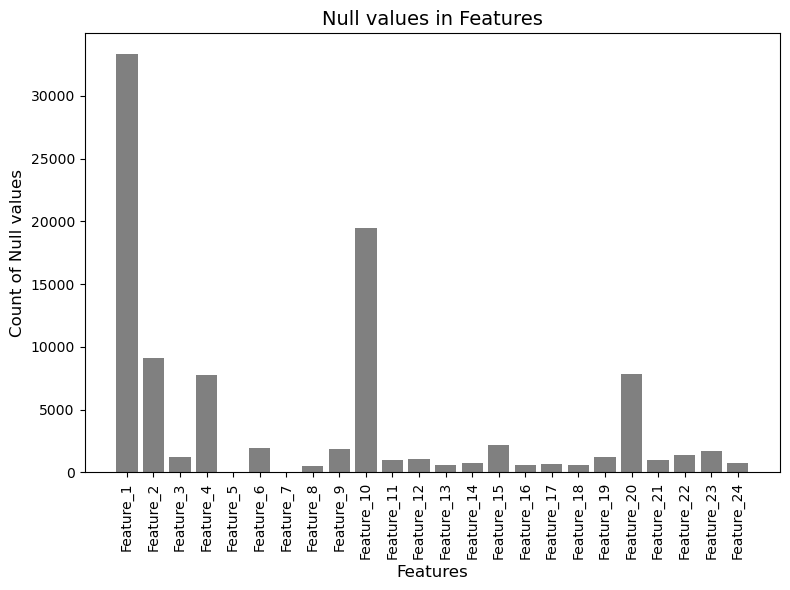

In [7]:
plt.figure(figsize = [8,6])
plt.bar(feature_df.index, feature_df, align = "center",color = "grey")
plt.xlabel('Features', fontsize=12)
plt.ylabel('Count of Null values', fontsize = 12)
plt.title('Null values in Features', fontsize=14)

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()







<Figure size 1500x800 with 0 Axes>

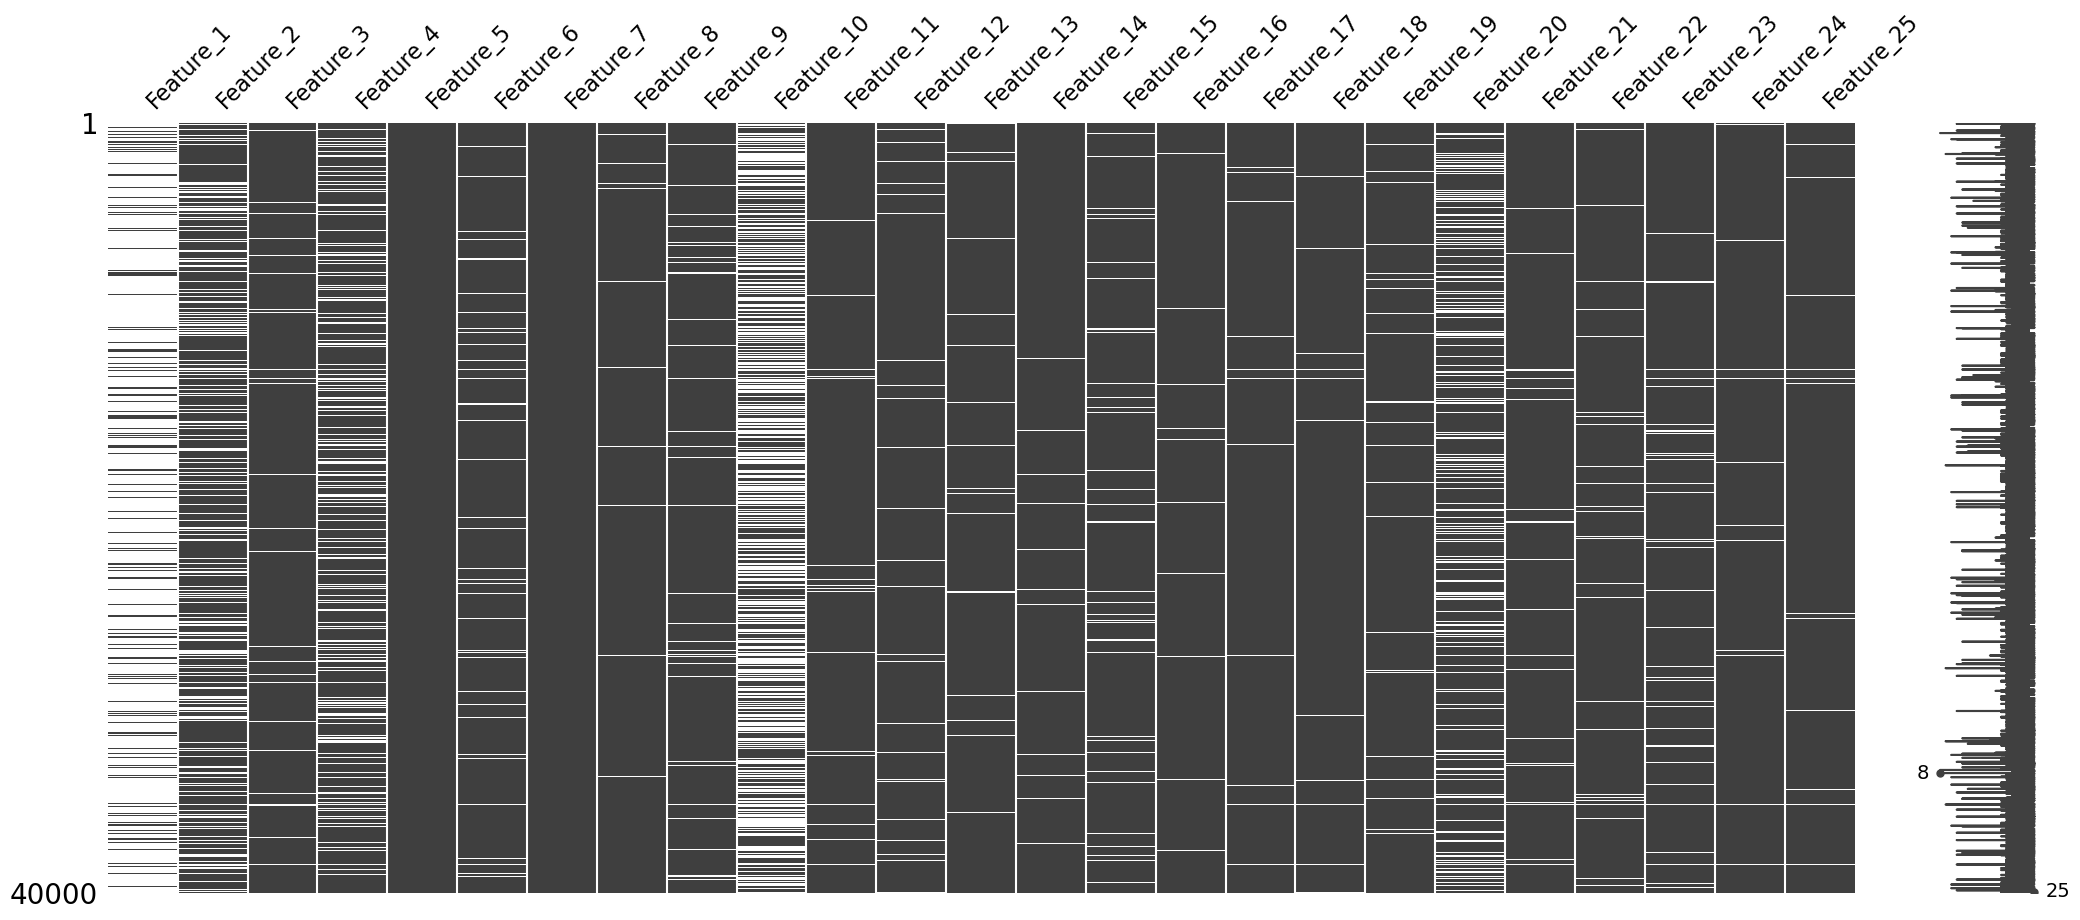

In [8]:
plt.figure(figsize = [15,8])
msno.matrix(data.iloc[:,1:26])
plt.show()

In [9]:
return_120 = data.iloc[:,28:147].isna().sum()


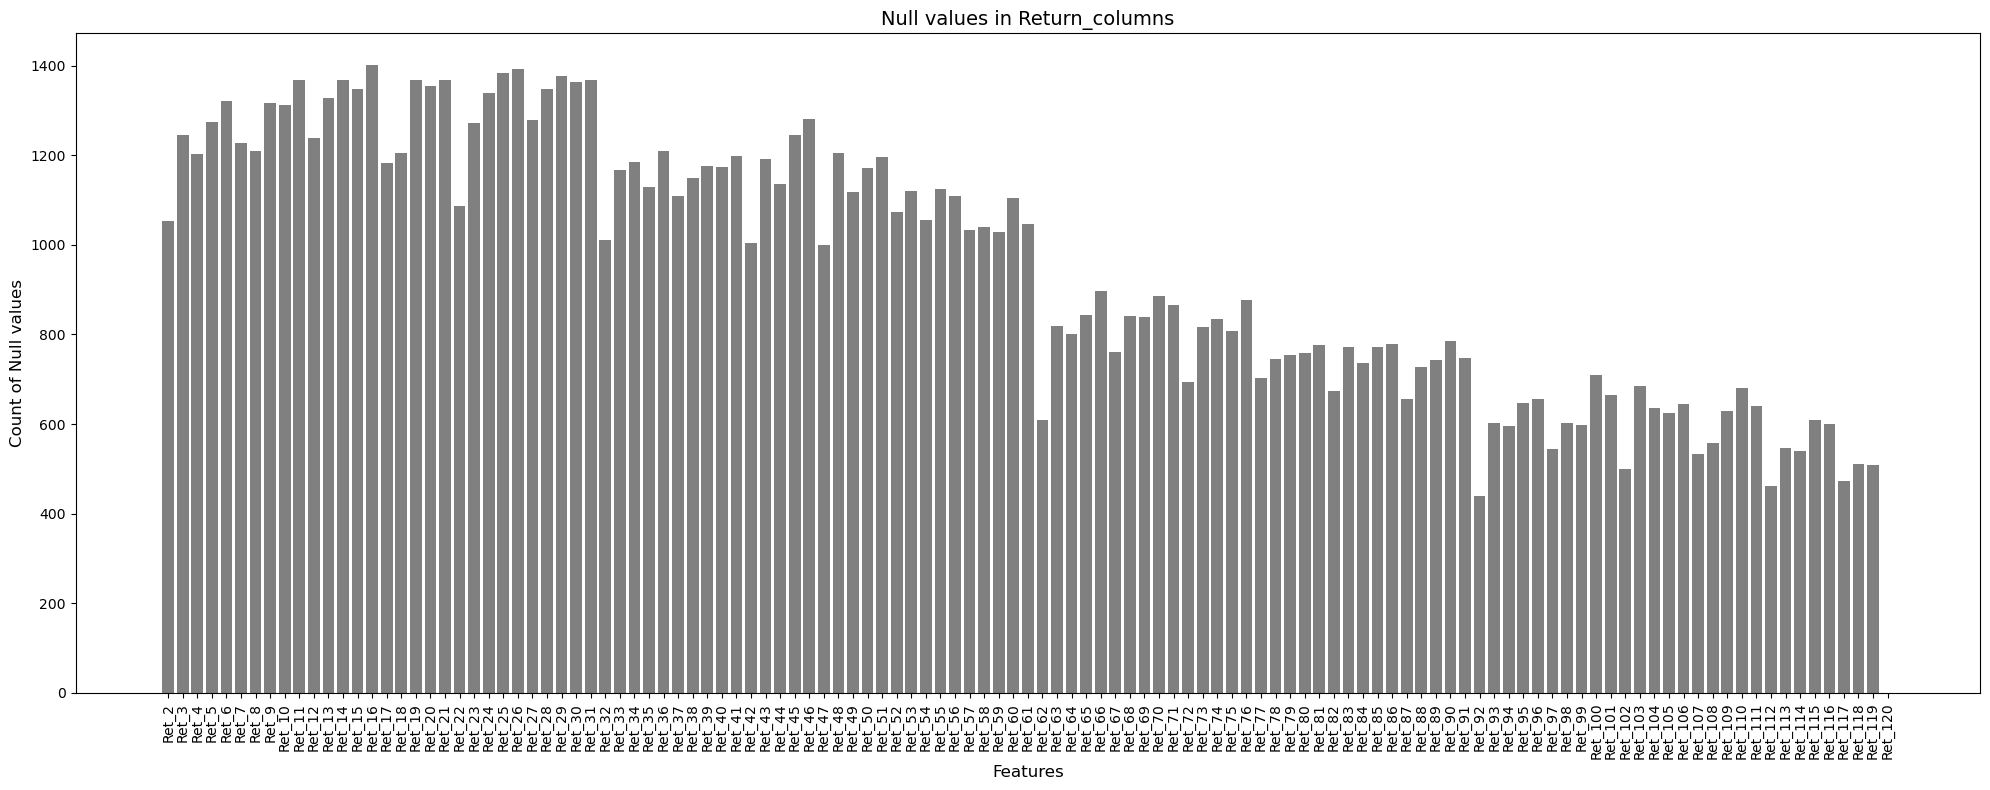

In [10]:
plt.figure(figsize = [20,8])
plt.bar(return_120.index,return_120, align = "center",color = "grey")
plt.xlabel('Features', fontsize=12)
plt.ylabel('Count of Null values', fontsize = 12)
plt.title('Null values in Return_columns', fontsize=14)

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


##  <span style="color:orange;">DEALING WITH NULL VALUES</span>

In [11]:
mean = data.mean()
data = data.fillna(mean)

In [12]:
data.head()

,Id,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Feature_11,Feature_12,Feature_13,Feature_14,Feature_15,Feature_16,Feature_17,Feature_18,Feature_19,Feature_20,Feature_21,Feature_22,Feature_23,Feature_24,Feature_25,Ret_MinusTwo,Ret_MinusOne,Ret_2,Ret_3,Ret_4,Ret_5,Ret_6,Ret_7,Ret_8,Ret_9,Ret_10,Ret_11,Ret_12,Ret_13,Ret_14,Ret_15,Ret_16,Ret_17,Ret_18,Ret_19,Ret_20,Ret_21,Ret_22,Ret_23,Ret_24,Ret_25,Ret_26,Ret_27,Ret_28,Ret_29,Ret_30,Ret_31,Ret_32,Ret_33,Ret_34,Ret_35,Ret_36,Ret_37,Ret_38,Ret_39,Ret_40,Ret_41,Ret_42,Ret_43,Ret_44,Ret_45,Ret_46,Ret_47,Ret_48,Ret_49,Ret_50,Ret_51,Ret_52,Ret_53,Ret_54,Ret_55,Ret_56,Ret_57,Ret_58,Ret_59,Ret_60,Ret_61,Ret_62,Ret_63,Ret_64,Ret_65,Ret_66,Ret_67,Ret_68,Ret_69,Ret_70,Ret_71,Ret_72,Ret_73,Ret_74,Ret_75,Ret_76,Ret_77,Ret_78,Ret_79,Ret_80,Ret_81,Ret_82,Ret_83,Ret_84,Ret_85,Ret_86,Ret_87,Ret_88,Ret_89,Ret_90,Ret_91,Ret_92,Ret_93,Ret_94,Ret_95,Ret_96,Ret_97,Ret_98,Ret_99,Ret_100,Ret_101,Ret_102,Ret_103,Ret_104,Ret_105,Ret_106,Ret_107,Ret_108,Ret_109,Ret_110,Ret_111,Ret_112,Ret_113,Ret_114,Ret_115,Ret_116,Ret_117,Ret_118,Ret_119,Ret_120,Ret_121,Ret_122,Ret_123,Ret_124,Ret_125,Ret_126,Ret_127,Ret_128,Ret_129,Ret_130,Ret_131,Ret_132,Ret_133,Ret_134,Ret_135,Ret_136,Ret_137,Ret_138,Ret_139,Ret_140,Ret_141,Ret_142,Ret_143,Ret_144,Ret_145,Ret_146,Ret_147,Ret_148,Ret_149,Ret_150,Ret_151,Ret_152,Ret_153,Ret_154,Ret_155,Ret_156,Ret_157,Ret_158,Ret_159,Ret_160,Ret_161,Ret_162,Ret_163,Ret_164,Ret_165,Ret_166,Ret_167,Ret_168,Ret_169,Ret_170,Ret_171,Ret_172,Ret_173,Ret_174,Ret_175,Ret_176,Ret_177,Ret_178,Ret_179,Ret_180,Ret_PlusOne,Ret_PlusTwo,Weight_Intraday,Weight_Daily
0,1,3.59025,-0.117558,0.558392,0.405572,8.0,0.430972,75751,0.2254,11.0,4.744703,-0.572244,0.49,5.0,1.842984,27.053679,1.0,-0.549725,0.803059,-0.925463,2.0,0.605593,-0.489492,0.799833,-1.209290,-0.329675,0.055275,-0.010770,0.000003,-0.000734,-0.000738,-0.000007,0.000423,0.000438,-0.000076,0.000645,-0.000006,0.000006,4.886832e-07,-0.000156,0.000029,-0.000005,-0.000430,-1.964625e-05,0.000002,-0.000031,-0.000022,0.000025,-7.539950e-06,-0.000042,0.000416,-0.000164,-0.000009,-0.000438,-0.000018,0.000010,-7.176461e-04,-0.000162,-0.000003,0.000009,0.000027,-0.000582,0.001003,-0.000010,0.000134,0.000014,-0.000142,-0.001003,-0.000007,-0.000005,-1.277039e-05,-0.000027,0.000706,-0.000734,-7.311366e-04,-0.001996,-0.000153,0.000133,0.000001,0.000015,-0.000007,0.000713,0.000009,-0.000021,-0.000432,-0.001152,-0.000723,9.982299e-07,-0.003579,0.000435,-0.000012,-0.000132,0.000004,0.000418,-0.000011,0.000024,-0.002724,-0.002996,0.000129,0.000012,-0.000002,-1.369941e-04,-0.003537,-0.000142,0.000135,0.000020,-1.318606e-04,0.000449,-0.000008,0.000006,0.000282,-1.390130e-04,-1.284489e-04,0.000005,-0.000005,-1.693501e-03,-0.002141,0.000003,-0.000274,-0.000015,0.001279,0.000282,-0.000003,-0.000156,0.000024,-0.000560,-0.000580,0.000138,-0.002277,0.000125,0.000406,-0.000427,-0.000013,-0.000843,1.666111e-04,0.000569,0.000695,0.000019,0.000700,-0.000843,0.000268,-0.000415,-0.001133,0.000004,-0.000137,-0.000009,1.340780e-04,-0.000137,-0.000565,-0.000704,-0.005605,0.000826,0.001966,0.002676,0.000422,-0.000428,-0.000539,-0.002113,-0.001400,-0.000017,-0.002801,-0.000003,0.002099,0.000698,0.000547,-0.001976,0.000012,0.001112,0.000284,0.000003,-0.001976,-0.000842,-0.001390,0.000148,2.846942e-04,0.001254,-0.000130,0.000126,0.000978,0.000151,0.002642,-0.000017,0.000140,0.000015,-0.000011,0.001683,-0.000286,0.000010,0.000152,0.000579,-1.501973e-04,0.000822,0.001392,0.000292,0.000002,0.001133,-0.000134,0.001539,-0.000142,0.000861,0.000544,-0.002688,0.002246,-0.000838,-6.953224e-04,0.000003,-0.001974,-0.019512,0.028846,1.251508e+06,1.564385e+06
1,2,3.59025,-0.117558,0.558392,0.405572,3.0,0.388896,17369,0.0166,13.0,4.744703,-0.409923,0.71,9.0,1.577586,9.546915,1.0,-0.949891,0.917958,-0.897067,9.0,0.886205,-0.151805,1.239856,0.953424,-0.709462,0.009748,0.002987,-0.000487,0.000475,0.000002,-0.000002,-0.000523,-0.000255,-0.0000

In [13]:
feature_df = data.iloc[:,1:26]
return_120 = data.iloc[:,28:147]
return_180 = data.iloc[:,147:207]
ret_120_180 = data.iloc[:,28:207]

In [14]:
a = feature_df.isna().sum()
b = return_120.isna().sum()

<Figure size 1500x800 with 0 Axes>

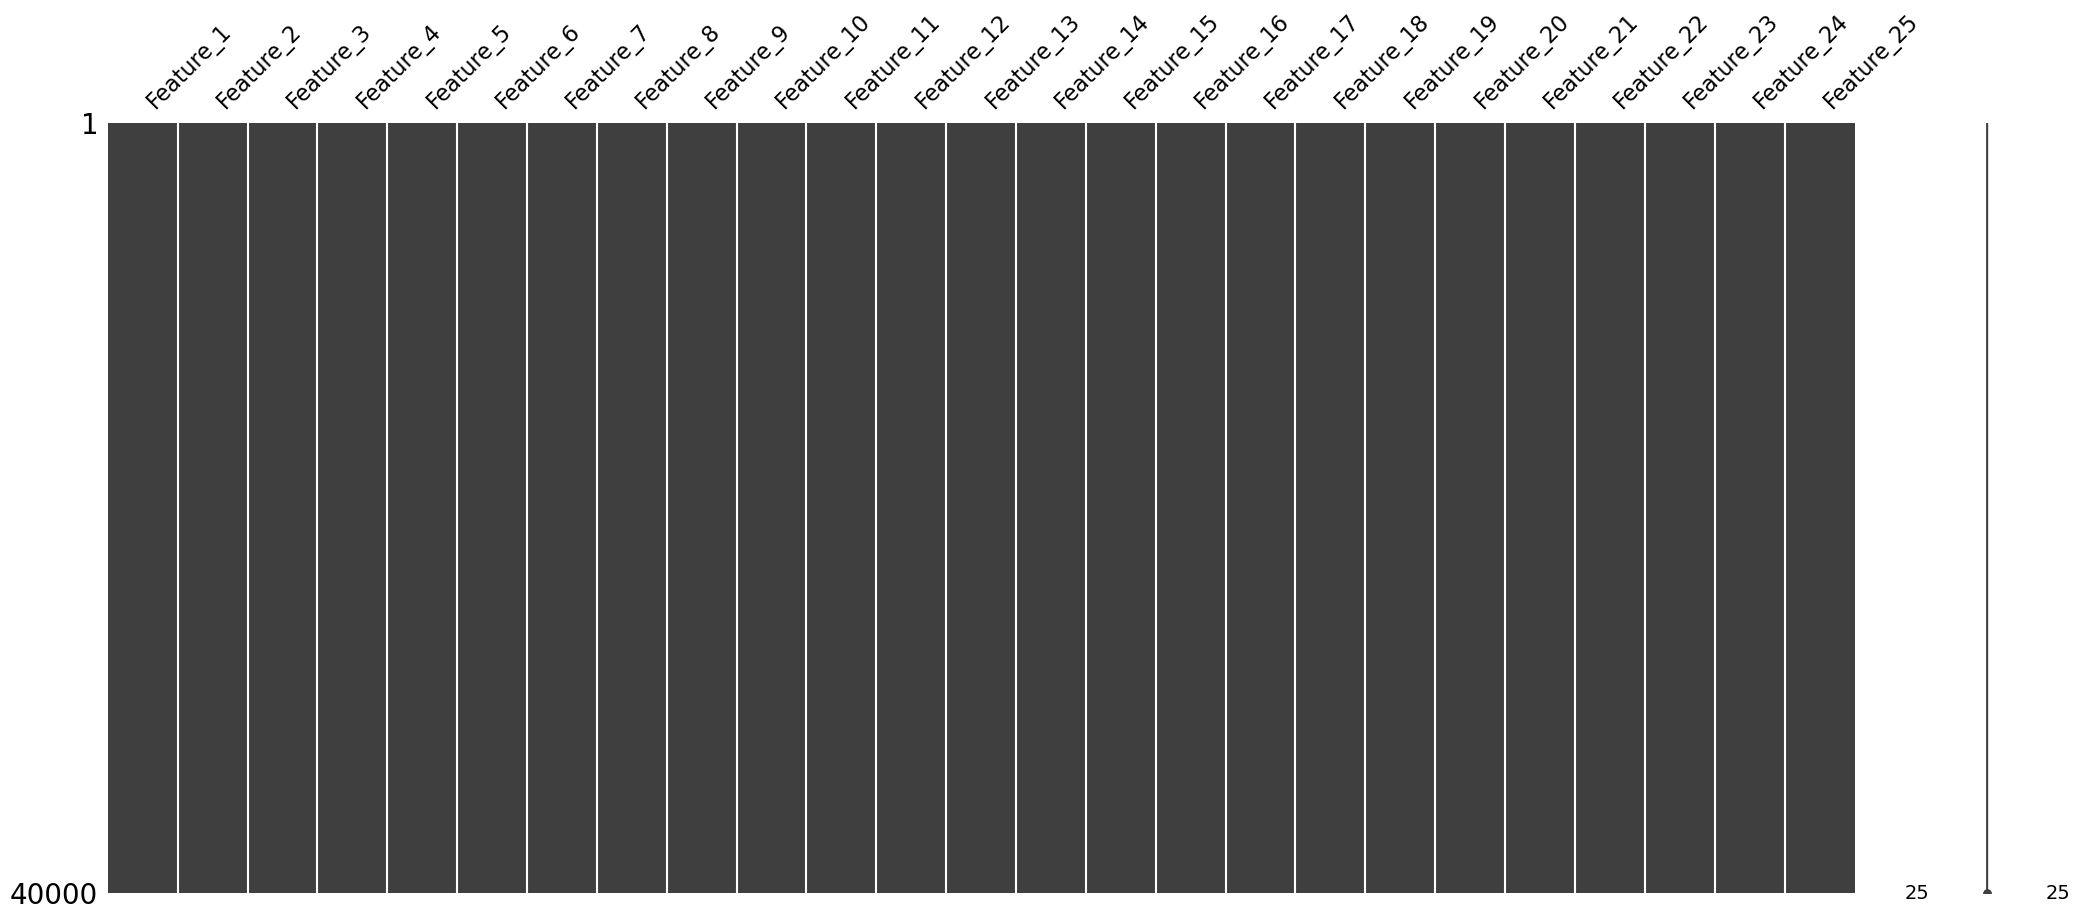

In [15]:
plt.figure(figsize = [15,8])
msno.matrix(data.iloc[:,1:26])
plt.show()

<Figure size 1500x800 with 0 Axes>

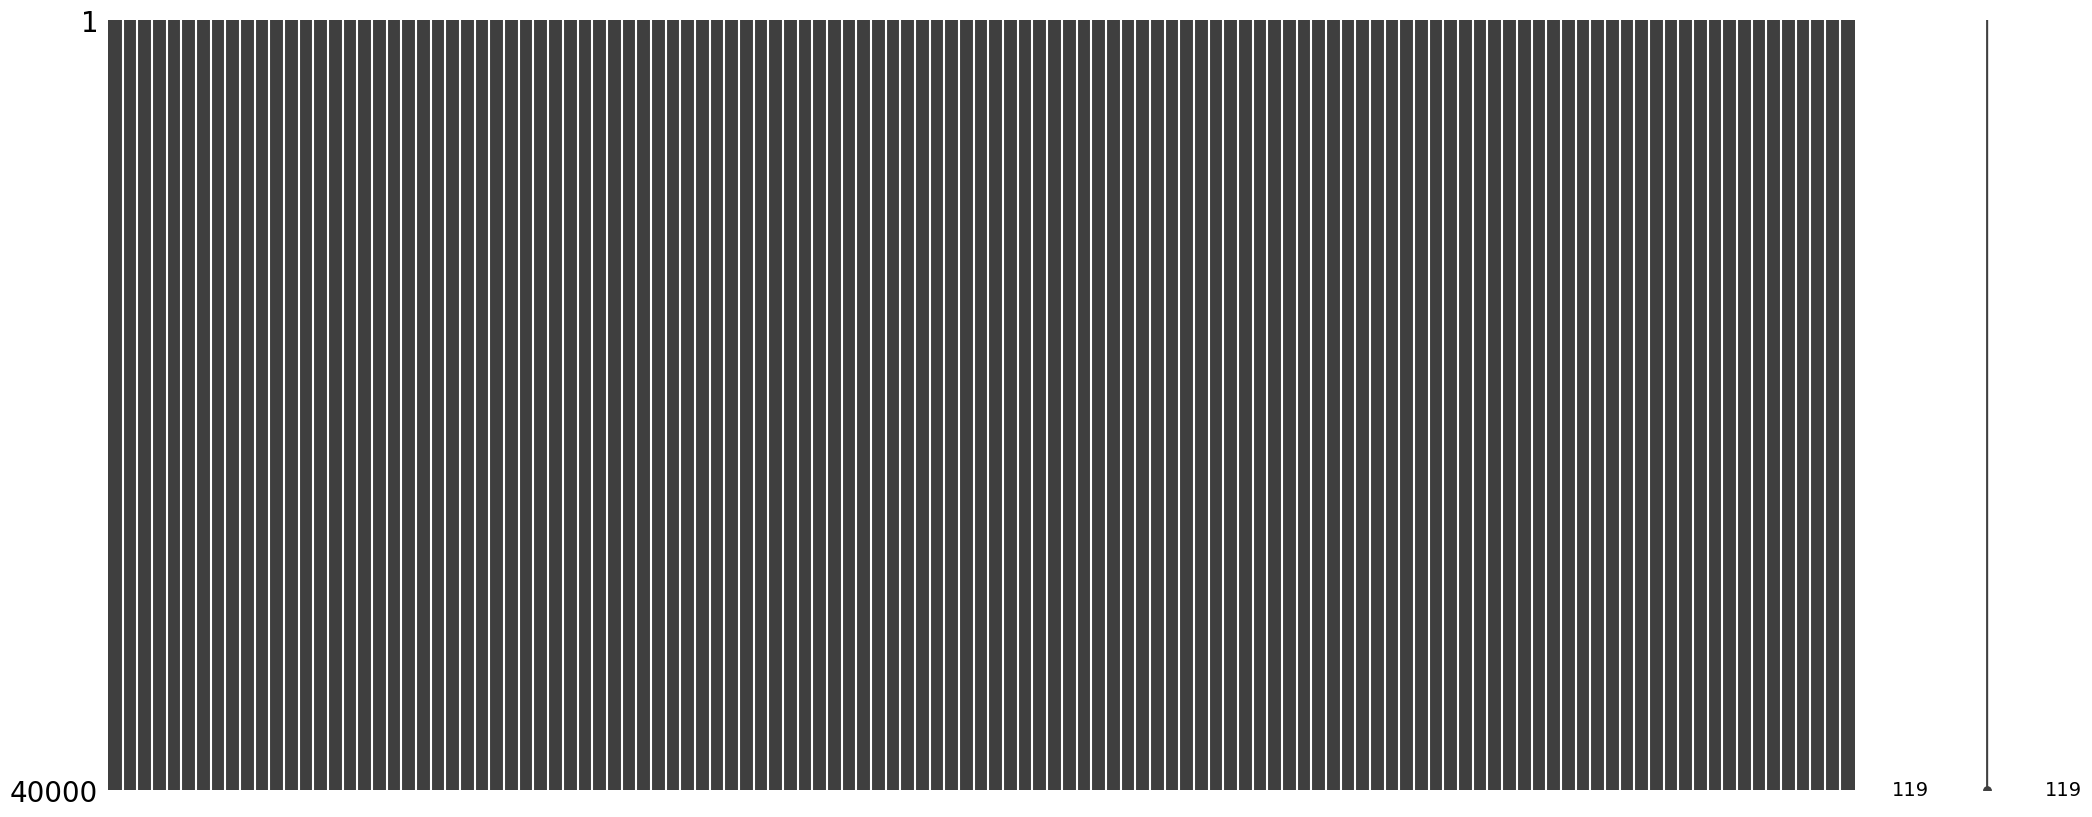

In [16]:
plt.figure(figsize = [15,8])
msno.matrix(data.iloc[:,28:147])
plt.show()

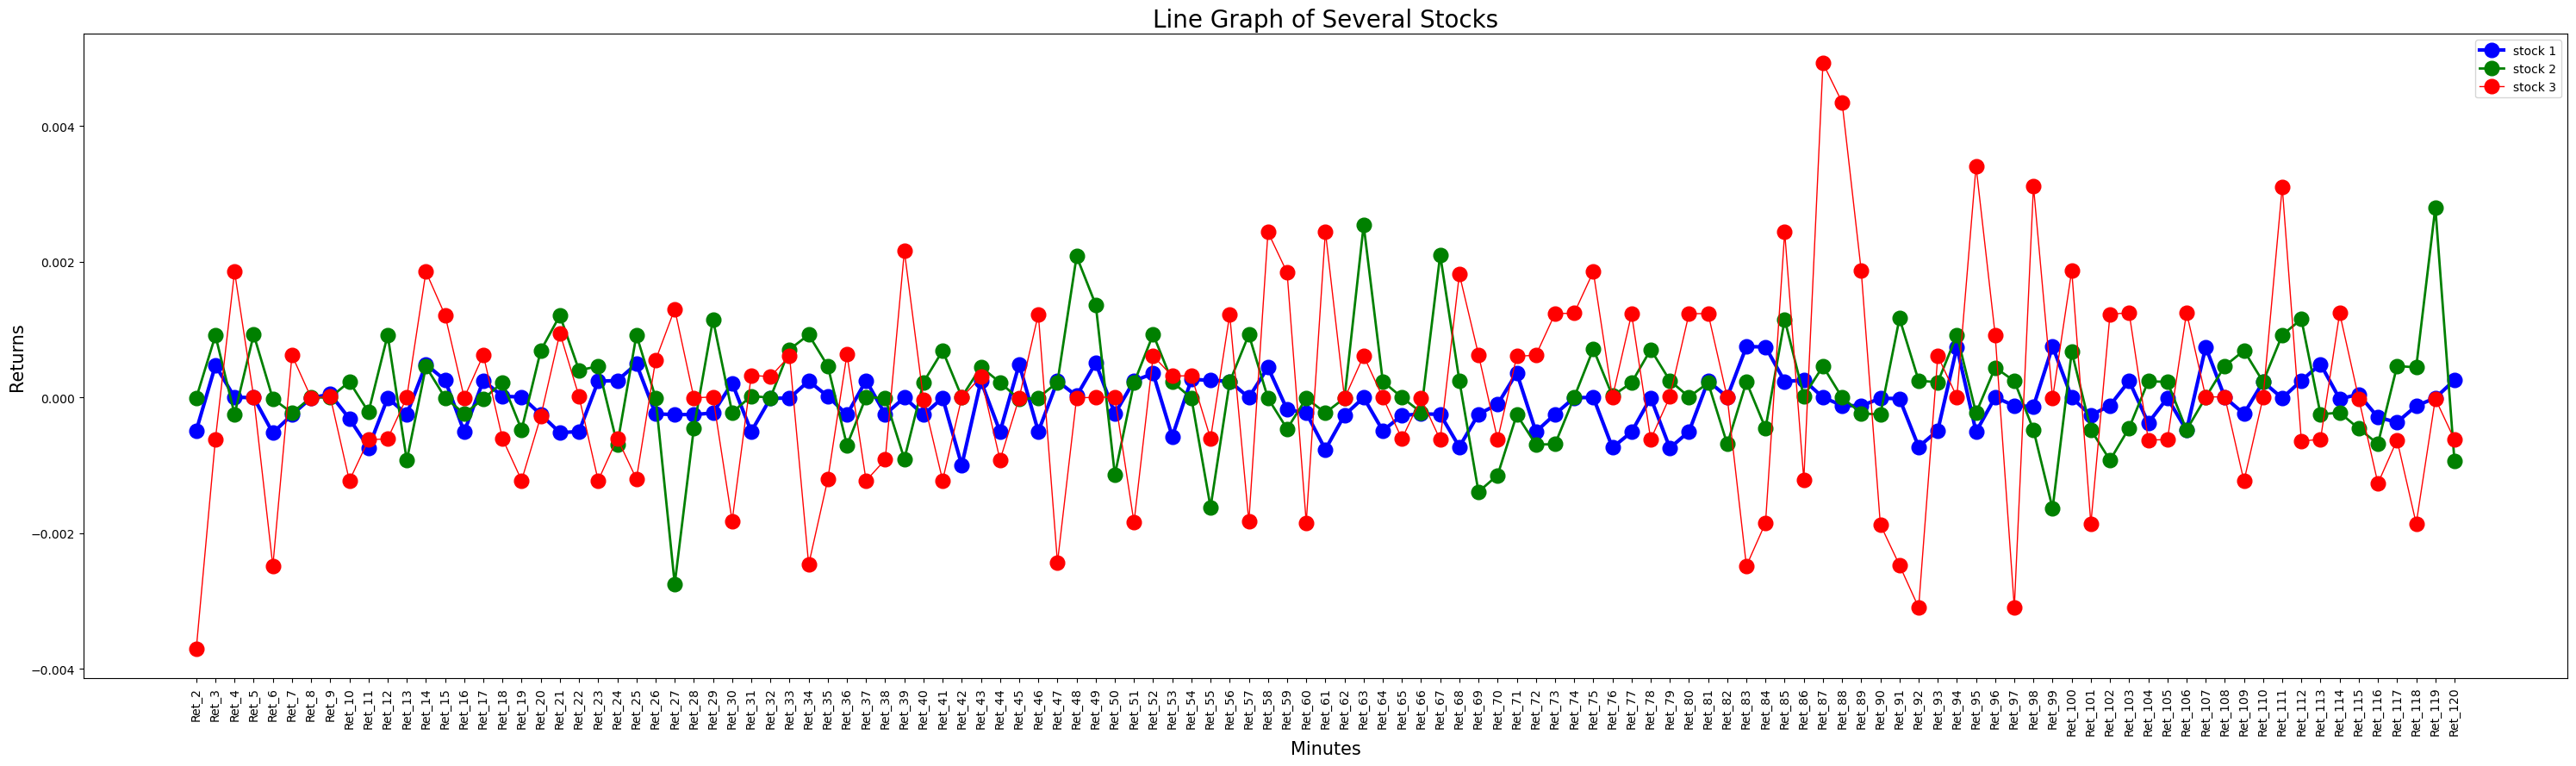

In [17]:

plt.figure(figsize = [30,9])
row_to_plot = return_120.iloc[1]
row_to_plot_1 = return_120.iloc[3]

x_labels = row_to_plot.index
y_values = row_to_plot.values

# Create a line plot
plt.plot(x_labels, return_120.iloc[1], marker='o',ms = 12, linestyle='-',linewidth = 3, color = "blue", label = "stock 1")
plt.plot(x_labels,return_120.iloc[5] , marker='o',ms = 12, linestyle='-',linewidth = 2, color = "green",label = "stock 2")
plt.plot(x_labels,return_120.iloc[9] , marker='o',ms = 12, linestyle='-',linewidth = 1, color = "red",label = "stock 3")

plt.xlabel('Minutes', fontsize = 15)
plt.ylabel('Returns', fontsize = 15)
plt.title('Line Graph of Several Stocks', fontsize = 20)
plt.xticks(rotation=90)
plt.legend()

plt.tight_layout()
plt.show()


In [18]:
corr_df = data.iloc[:,1:28] 
a = corr_df.corr()

In [19]:
mask = np.zeros_like(a)
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True

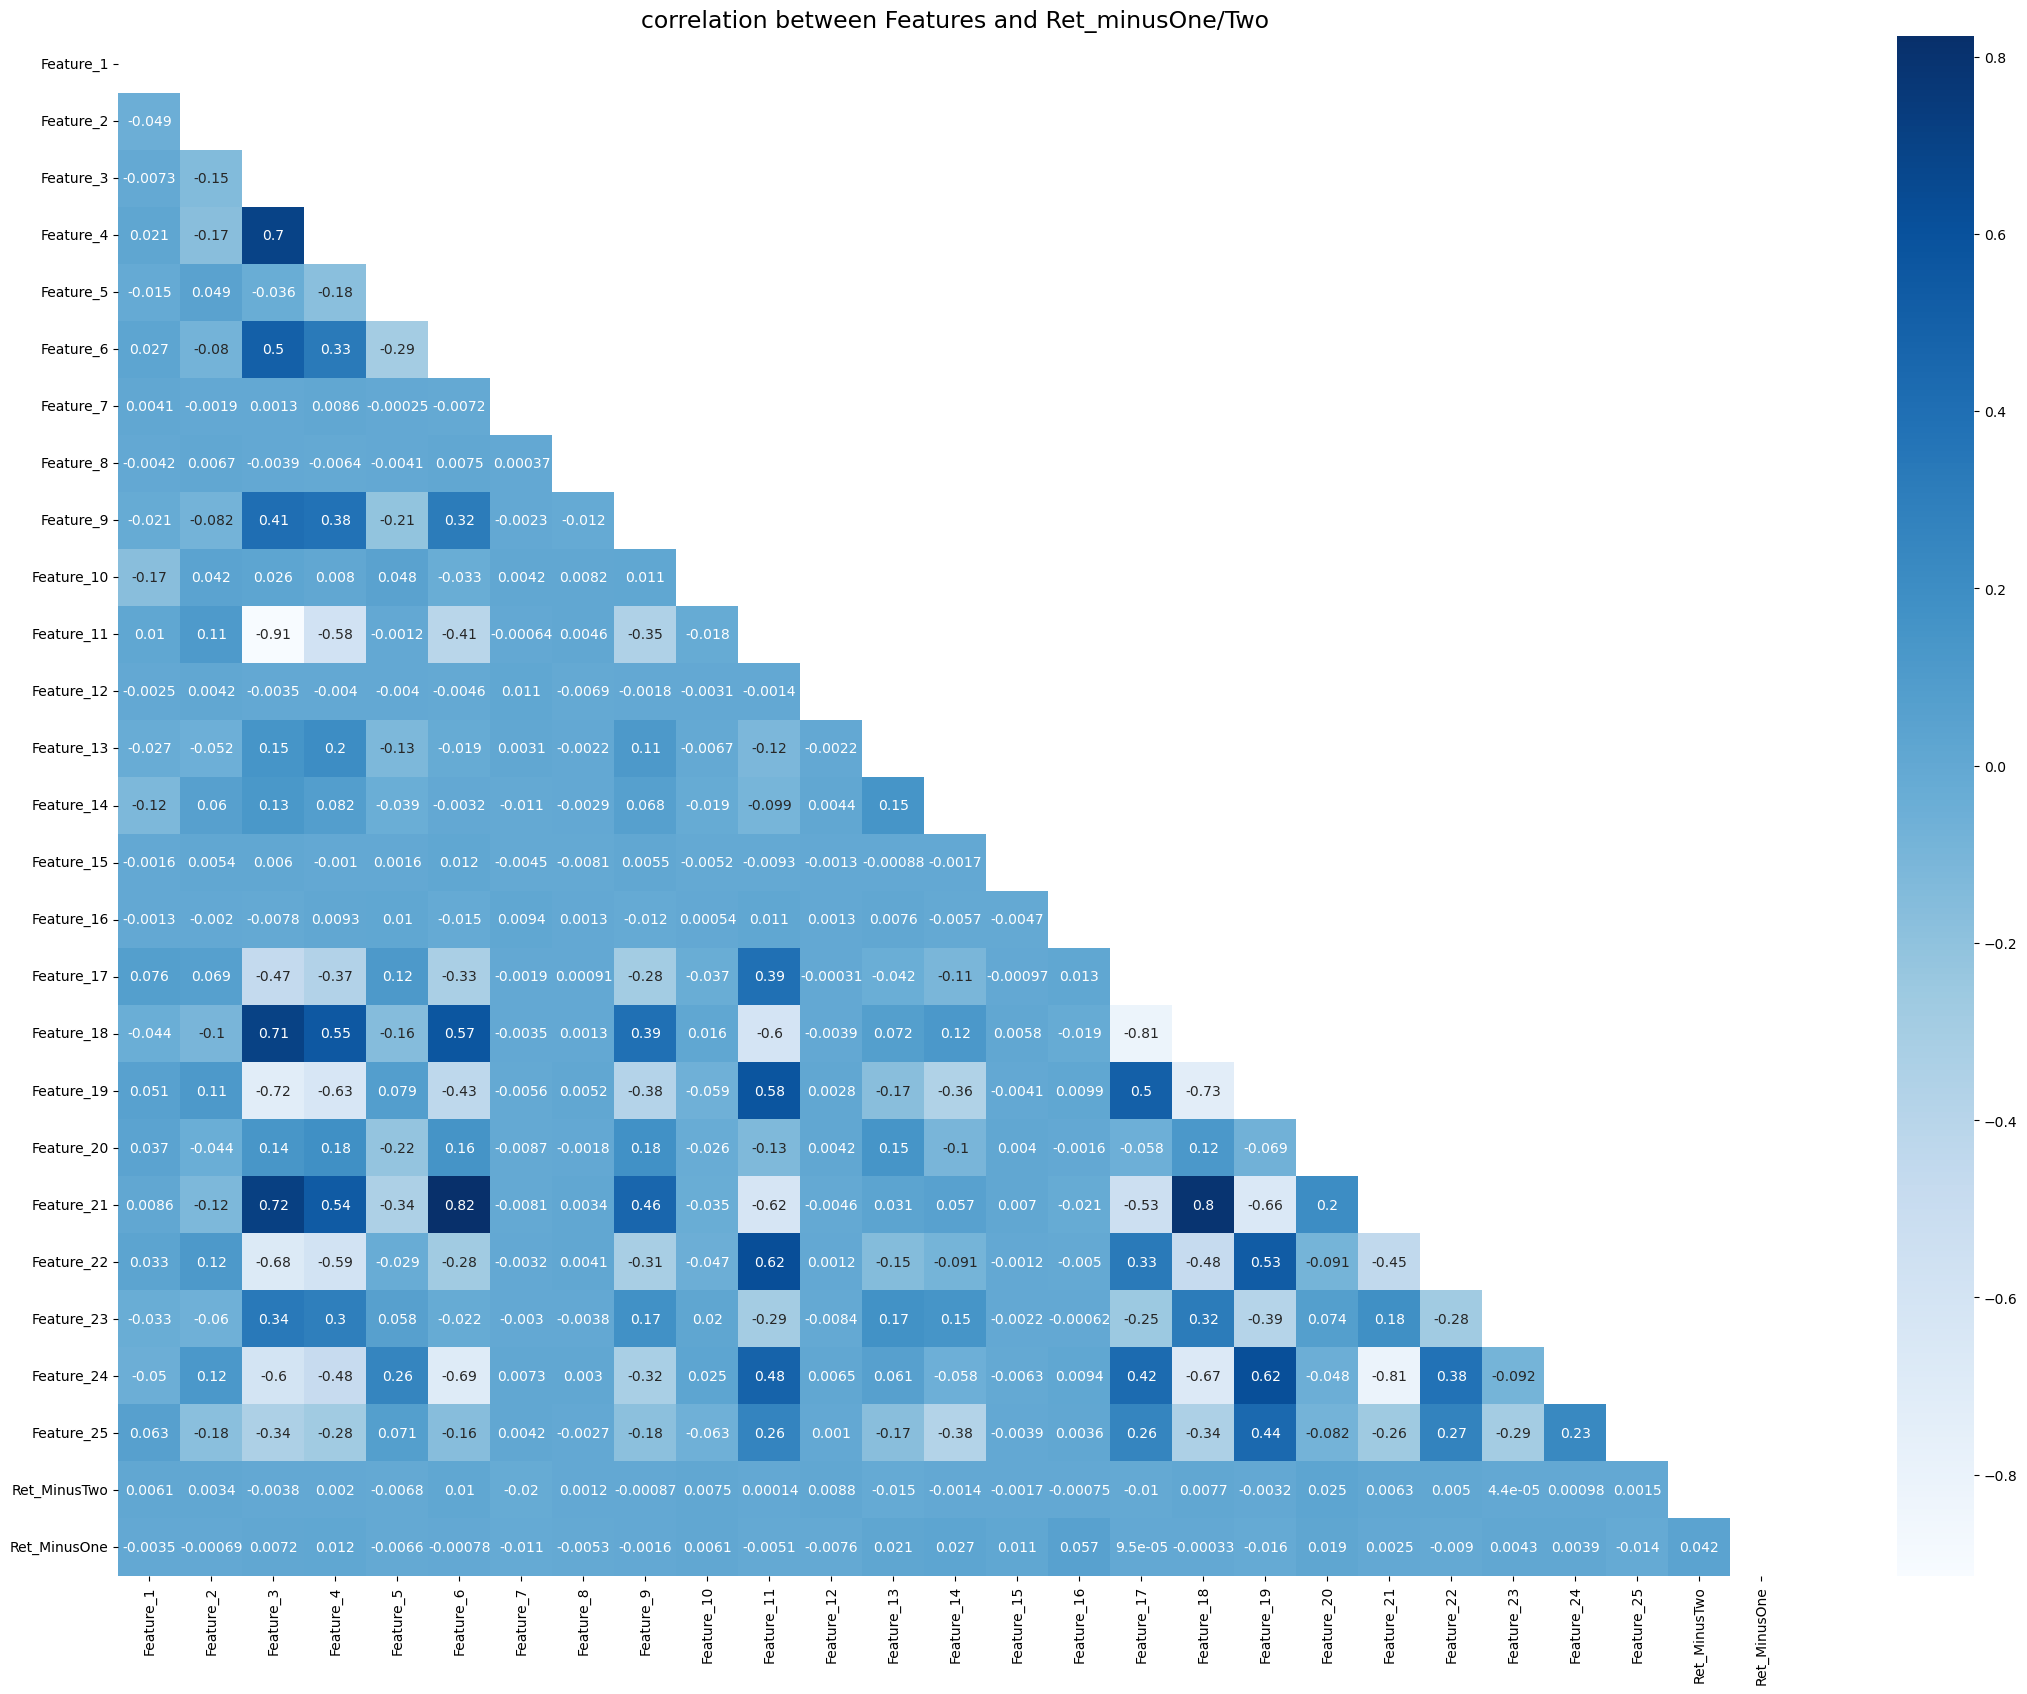

In [20]:
plt.figure(figsize = [27,20])
sns.heatmap(a, mask = mask, annot  = True, cmap = "Blues")
plt.title("correlation between Features and Ret_minusOne/Two", fontsize = 17)
plt.show()

In [21]:
# Set the correlation threshold
correlation_threshold = 0.75

# Extract features with correlations above the threshold
highly_correlated_features = []
for column in a.columns:
    correlated_features = a.index[a[column] >= correlation_threshold].tolist()
    correlated_features.remove(column)  # Remove the feature itself
    highly_correlated_features.extend([(column, feature) for feature in correlated_features])

print("List of features correlated above 0.6:")
for pair in highly_correlated_features:
    print(pair)

List of features correlated above 0.6:
('Feature_6', 'Feature_21')
('Feature_18', 'Feature_21')
('Feature_21', 'Feature_6')
('Feature_21', 'Feature_18')


##  <span style="color:orange;">PREREQUISITES FOR MODEL BUILDING!
</span>

###  <span style="color:purple;">DataFrames for Intraday!
</span>

In [22]:
a = data.iloc[:,1:26]
b = data.iloc[:,-74:-64]
target_for_intraday = data.iloc[:,147:207]

In [23]:
target_for_intraday.head()

,Ret_121,Ret_122,Ret_123,Ret_124,Ret_125,Ret_126,Ret_127,Ret_128,Ret_129,Ret_130,Ret_131,Ret_132,Ret_133,Ret_134,Ret_135,Ret_136,Ret_137,Ret_138,Ret_139,Ret_140,Ret_141,Ret_142,Ret_143,Ret_144,Ret_145,Ret_146,Ret_147,Ret_148,Ret_149,Ret_150,Ret_151,Ret_152,Ret_153,Ret_154,Ret_155,Ret_156,Ret_157,Ret_158,Ret_159,Ret_160,Ret_161,Ret_162,Ret_163,Ret_164,Ret_165,Ret_166,Ret_167,Ret_168,Ret_169,Ret_170,Ret_171,Ret_172,Ret_173,Ret_174,Ret_175,Ret_176,Ret_177,Ret_178,Ret_179,Ret_180
0,-0.000137,-0.000565,-0.000704,-0.005605,0.000826,0.001966,0.002676,0.000422,-0.000428,-0.000539,-0.002113,-0.001400,-0.000017,-0.002801,-0.000003,0.002099,0.000698,0.000547,-0.001976,0.000012,0.001112,0.000284,0.000003,-0.001976,-0.000842,-0.001390,0.000148,2.846942e-04,0.001254,-0.000130,0.000126,0.000978,0.000151,0.002642,-0.000017,0.000140,0.000015,-0.000011,0.001683,-0.000286,0.000010,0.000152,0.000579,-1.501973e-04,0.000822,0.001392,0.000292,0.000002,0.001133,-0.000134,0.001539,-0.000142,0.000861,0.000544,-0.002688,0.002246,-0.000838,-6.953224e-04,0.000003,-0.001974
1,0.000261,0.000238,-0.000113,-0.000248,-0.000351,-0.000003,-0.000002,0.000267,0.000263,-0.000240,0.000513,0.000721,-0.000235,-0.000005,0.000002,-0.000160,-0.000612,0.000247,-0.000483,0.000006,0.000249,-0.000122,0.000261,-0.000145,-0.000104,0.000555,0.000259,2.559339e-05,0.000004,-0.000255,0.000263,0.000250,0.000104,0.000119,-0.000483,0.000128,0.000886,0.000003,0.000148,0.000623,0.000507,-0.000742,-0.000514,8.881545e-07,0.000090,-0.000361,-0.000738,-0.000502,0.000497,0.000256,-0.000256,-0.000005,-0.000497,0.000240,-0.000129,0.000123,0.000248,3.315418e-07,0.000003,0.000027
2,0.000271,0.000126,0.000655,-0.000515,-0.000924,-0.000769,0.000282,-0.000120,0.000408,-0.000267,0.000390,-0.000770,-0.000009,-0.000011,0.000005,0.000139,-0.000270,-0.000269,-0.000663,0.001308,-0.000649,-0.000382,0.000129,-0.000002,-0.000003,-0.000102,-0.000292,5.032658e-04,-0.000126,-0.000135,0.000238,-0.000106,-0.000137,-0.000419,-0.000379,0.000013,0.000001,-0.000009,-0.000283,-0.000526,0.000247,-0.000134,0.000675,1.136847e-04,0.000234,-0.000506,-0.000007,-0.000249,0.000119,0.000277,0.000656,0.000127,0.000255,0.000278,-0.000524,-0.000394,0.000116,5.322557e-04,0.000274,0.000784
3,0.000210,-0.000301,-0.000142,0.000068,-0.000508,-0.000122,0.000295,0.000297,-0.000199,-0.000217,-0.000270,0.000071,0.000150,-0.000084,0.000072,0.000486,0.000008,-0.000234,0.000078,0.000051,0.000097,-0.000080,0.000054,-0.000157,0.000120,-0.000119,0.000285,-1.020028e-07,0.000285,-0.000350,0.000214,-0.000703,0.000153,-0.000286,0.000136,-0.000579,-0.000139,-0.000005,-0.000009,0.000010,0.000290,-0.000068,-0.000352,2.739541e-04,-0.000292,0.000446,0.000288,0.000001,0.000304,-0.000027,0.000371,-0.000055,-0.000161,-0.000155,0.000346,-0.000090,0.000288,-1.281102e-04,0.000074,0.000341
4,0.000011,0.000013,0.000622,0.000612,-0.001207,0.001233,-0.001234,-0.000003,0.001226,0.000009,0.000006,0.000020,-0.001224,-0.001210,0.001210,-0.000017,-0.000020,-0.000012,0.001219,-0.001201,-0.000003,0.001216,-0.000233,0.000249,-0.000979,0.000978,-0.000014,-1.218838e-03,0.001208,-0.000013,-0.000620,0.000606,-0.001238,0.000002,0.000003,-0.001226,0.001005,-0.000008,0.000231,-0.000006,-0.001212,0.000005,0.001220,-1.221212e-03,-0.000016,-0.000007,0.001222,0.000018,-0.001219,0.000006,0.001214,0.001221,-0.000005,-0.000007,-0.001235,0.000027,0.002449,8.619882e-06,0.001209,-0.000004


In [24]:
intraday_columns = pd.concat([a,b],axis = 1)

In [25]:
list_of_intraday_col = [intraday_columns.columns]
list_of_intraday_col

[Index(['Feature_1', 'Feature_2', 'Feature_3', 'Feature_4', 'Feature_5',
        'Feature_6', 'Feature_7', 'Feature_8', 'Feature_9', 'Feature_10',
        'Feature_11', 'Feature_12', 'Feature_13', 'Feature_14', 'Feature_15',
        'Feature_16', 'Feature_17', 'Feature_18', 'Feature_19', 'Feature_20',
        'Feature_21', 'Feature_22', 'Feature_23', 'Feature_24', 'Feature_25',
        'Ret_111', 'Ret_112', 'Ret_113', 'Ret_114', 'Ret_115', 'Ret_116',
        'Ret_117', 'Ret_118', 'Ret_119', 'Ret_120'],
       dtype='object')]

###  <span style="color:purple;">DataFrames for Interday!
</span>

In [26]:
c = data.iloc[:,1:26]
d = data.iloc[:,26:28]
target_for_interday = data.iloc[:,-4:-2]

In [27]:
target_for_interday.head()

,Ret_PlusOne,Ret_PlusTwo
0,-0.019512,0.028846
1,-0.002939,-0.010253
2,-0.024791,0.015711
3,-0.005680,-0.002190
4,0.036104,-0.026552


In [28]:
interday_columns = pd.concat([c,d], axis = 1)

In [29]:
list_of_interday_col = [interday_columns.columns]
list_of_interday_col

[Index(['Feature_1', 'Feature_2', 'Feature_3', 'Feature_4', 'Feature_5',
        'Feature_6', 'Feature_7', 'Feature_8', 'Feature_9', 'Feature_10',
        'Feature_11', 'Feature_12', 'Feature_13', 'Feature_14', 'Feature_15',
        'Feature_16', 'Feature_17', 'Feature_18', 'Feature_19', 'Feature_20',
        'Feature_21', 'Feature_22', 'Feature_23', 'Feature_24', 'Feature_25',
        'Ret_MinusTwo', 'Ret_MinusOne'],
       dtype='object')]

###  <span style="color:purple;"> Train_Test Spliting of Intraday
</span>

In [30]:
X_train_intra,X_test_intra,y_train_intra,y_test_intra = train_test_split(intraday_columns,
                                                                         target_for_intraday,test_size = 0.2, random_state = 0)

In [31]:
y_test_intra

,Ret_121,Ret_122,Ret_123,Ret_124,Ret_125,Ret_126,Ret_127,Ret_128,Ret_129,Ret_130,Ret_131,Ret_132,Ret_133,Ret_134,Ret_135,Ret_136,Ret_137,Ret_138,Ret_139,Ret_140,Ret_141,Ret_142,Ret_143,Ret_144,Ret_145,Ret_146,Ret_147,Ret_148,Ret_149,Ret_150,Ret_151,Ret_152,Ret_153,Ret_154,Ret_155,Ret_156,Ret_157,Ret_158,Ret_159,Ret_160,Ret_161,Ret_162,Ret_163,Ret_164,Ret_165,Ret_166,Ret_167,Ret_168,Ret_169,Ret_170,Ret_171,Ret_172,Ret_173,Ret_174,Ret_175,Ret_176,Ret_177,Ret_178,Ret_179,Ret_180
12836,5.979722e-04,-0.000010,0.000278,-0.000007,-0.000582,-0.000310,0.000899,-8.847943e-04,-2.904588e-04,-0.000589,0.000592,0.000288,0.001499,-0.001175,0.000291,-0.000900,-0.000283,0.000292,-0.001747,-6.586522e-08,0.000284,0.000302,-0.000299,0.000004,0.000580,5.850851e-04,0.000002,-2.986091e-04,-0.000299,0.001175,0.000256,-0.000561,0.000584,0.000889,5.914523e-04,-0.000590,0.000582,0.001173,-0.000297,0.001473,-1.163935e-03,-0.000871,0.001198,-0.001172,0.000297,-0.000577,-0.000012,-0.000297,0.000871,0.003242,-0.000585,-0.000308,2.057977e-07,0.000288,-0.000280,-0.001185,-0.000591,0.000885,0.000886,-0.001157
10913,-7.107609e-04,0.000688,-0.000320,0.000815,-0.000118,-0.000359,-0.000344,6.884035e-04,1.037749e-03,-0.000700,0.000014,0.000012,-0.000470,-0.000265,-0.000698,0.000683,0.001043,0.000011,0.000168,5.213709e-04,0.000693,-0.001037,-0.000331,0.000019,0.000018,3.512680e-04,0.000079,6.950782e-04,0.000287,-0.000360,-0.000520,-0.000179,0.000020,-0.001060,3.602745e-04,0.000015,-0.000013,-0.000358,0.000622,0.000763,1.455676e-05,-0.000694,0.000372,-0.000333,0.000428,0.000274,-0.001050,-0.000164,0.000877,-0.000355,-0.000696,0.000001,-1.062807e-03,0.000512,-0.000362,0.000180,0.000169,-0.000189,0.000004,0.000338
4214,-1.731577e-04,0.000495,-0.000163,0.000326,-0.000002,0.000170,0.000491,6.815907e-04,1.749936e-04,0.000009,0.000348,-0.000663,-0.000317,-0.000329,0.000189,-0.000495,-0.000324,-0.000002,-0.000015,-1.807676e-04,-0.000672,0.000016,-0.000005,0.000164,0.000832,-1.522796e-05,0.000006,1.614253e-04,0.000512,-0.000324,0.000335,0.000495,0.000320,0.000352,9.431190e-07,0.000339,-0.000666,0.000508,-0.000161,-0.000177,-2.164907e-05,0.000317,-0.000499,-0.000496,-0.000183,-0.000176,0.000339,0.000333,0.000159,0.000170,0.001179,-0.000347,-4.971469e-04,0.000678,-0.000012,-0.000339,-0.000342,-0.000500,0.000004,0.000333
8198,4.570892e-04,-0.000208,0.000004,-0.000003,0.000015,0.000221,0.000219,2.269217e-04,1.915425e-06,-0.000219,0.000220,0.000212,0.000214,0.000230,-0.000437,-0.000668,-0.000668,0.000233,0.000002,-2.233093e-04,-0.000435,0.000004,0.000215,0.000230,0.000430,2.391775e-04,-0.000003,2.258865e-04,-0.000240,0.000213,0.000218,-0.000870,0.000457,-0.000238,-4.431836e-04,0.000222,-0.000637,-0.000022,-0.001112,0.000660,-1.233369e-04,0.000227,0.000335,-0.000330,0.000327,-0.000217,0.000654,-0.000220,0.000439,0.000117,-0.000116,0.000447,2.113717e-04,0.000224,0.000207,-0.000206,-0.000003,0.000108,-0.000326,-0.000223
31403,-2.684885e-05,0.000445,-0.000233,0.000223,-0.000005,-0.000419,0.000015,6.592317e-04,2.161592e-04,0.000010,-0.000896,-0.000452,0.000451,-0.000336,0.000362,-0.000433,0.000011,-0.000877,0.000430,-4.364793e-04,-0.000081,0.000091,0.000882,-0.000425,0.000891,-1.113341e-05,0.000881,-4.386562e-04,0.000863,-0.000444,-0.000085,-0.000135,-0.000137,0.000351,-7.916045e-04,-0.000084,0.000451,-0.000434,0.000436,-0.000434,4.384638e-04,0.000010,0.000019,-0.000451,-0.000440,0.000006,-0.000009,-0.000878,-0.000432,0.000021,0.000433,0.000448,-4.436107e-04,0.000436,0.000006,-0.000438,-0.001741,0.000886,0.001318,-0.000435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38220,5.042083e-04,0.000007,-0.000145,0.000164,-0.000157,0.000327,0.000149,-4.650235e-04,-9.656807e-06,0.000157,-0.000176,-0.000491,-0.000320,0.000480,-0.000003,0.000320,0.000154,-0.000652,0.000480,-3.294759e-04,0.000341,0.000

In [32]:
print("X_train_intra shape:",(X_train_intra.shape))
print("X_test_intra shape:",(X_test_intra.shape))
print("y_train_intra shape:",(y_train_intra.shape))
print("y_test_intra shape:",(y_test_intra.shape))

X_train_intra shape: (32000, 35)
X_test_intra shape: (8000, 35)
y_train_intra shape: (32000, 60)
y_test_intra shape: (8000, 60)


### <span style="color:purple;"> Train_Test Spliting of Interday
</span>

In [33]:
X_train_inter,X_test_inter,y_train_inter,y_test_inter = train_test_split(interday_columns,
                                                                         target_for_interday,test_size = 0.2, random_state = 0)

In [34]:
print("X_train_inter shape:",(X_train_inter.shape))
print("X_test_inter shape:",(X_test_inter.shape))
print("y_train_inter shape:",(y_train_inter.shape))
print("y_test_inter shape:",(y_test_inter.shape))

X_train_inter shape: (32000, 27)
X_test_inter shape: (8000, 27)
y_train_inter shape: (32000, 2)
y_test_inter shape: (8000, 2)


#  <span style="color:orange;">MODEL TRAINING!
</span>

##  <span style="color:BLACK;">              1. LINEAR REGRESSION!
</span>

###  <span style="color:Purple;">1.1 LINEAR REGRESSION INTRADAY
 
</span>

In [35]:
intra_linear_reg = LinearRegression()
intra_linear_reg.fit(X=X_train_intra, y=y_train_intra)

LinearRegression()

In [36]:
def predict_returns(reg: RegressorMixin, X: pd.DataFrame, fh: list, prefix: str) -> pd.DataFrame:
    y_pred = reg.predict(X)
    result_cols = [f"{prefix}_{i}_pred" for i in fh]
    result = pd.DataFrame(y_pred, index=X.index, columns=result_cols)
    return result

In [37]:
y_test_pred_intra_linear_reg = predict_returns(
    reg=intra_linear_reg, 
    X=X_test_intra, 
    fh=[i for i in range(121, 181)], 
    prefix="Ret"
)

In [38]:
y_test_pred_intra_linear_reg.head()

,Ret_121_pred,Ret_122_pred,Ret_123_pred,Ret_124_pred,Ret_125_pred,Ret_126_pred,Ret_127_pred,Ret_128_pred,Ret_129_pred,Ret_130_pred,Ret_131_pred,Ret_132_pred,Ret_133_pred,Ret_134_pred,Ret_135_pred,Ret_136_pred,Ret_137_pred,Ret_138_pred,Ret_139_pred,Ret_140_pred,Ret_141_pred,Ret_142_pred,Ret_143_pred,Ret_144_pred,Ret_145_pred,Ret_146_pred,Ret_147_pred,Ret_148_pred,Ret_149_pred,Ret_150_pred,Ret_151_pred,Ret_152_pred,Ret_153_pred,Ret_154_pred,Ret_155_pred,Ret_156_pred,Ret_157_pred,Ret_158_pred,Ret_159_pred,Ret_160_pred,Ret_161_pred,Ret_162_pred,Ret_163_pred,Ret_164_pred,Ret_165_pred,Ret_166_pred,Ret_167_pred,Ret_168_pred,Ret_169_pred,Ret_170_pred,Ret_171_pred,Ret_172_pred,Ret_173_pred,Ret_174_pred,Ret_175_pred,Ret_176_pred,Ret_177_pred,Ret_178_pred,Ret_179_pred,Ret_180_pred
12836,-0.000116,0.000094,0.000238,0.000047,-0.000145,0.000036,0.000053,0.000019,-0.000048,0.000085,0.000033,0.000113,0.000122,0.000254,-0.000050,-0.000099,0.000217,0.000089,0.000070,0.000381,-0.000123,-3.098149e-05,-0.000012,-0.000025,0.000052,-0.000164,0.000080,-0.000070,0.000276,0.000253,-0.000252,0.000221,-0.000181,0.000123,-0.000139,0.000028,0.000022,-1.237745e-04,-0.000244,0.000005,-0.000269,-0.000105,-0.000023,-0.000077,0.000157,-0.000060,0.000072,-0.000024,-0.000022,0.000037,-0.000048,-0.000126,0.000247,-0.000151,0.000021,-0.000030,-0.000017,0.000174,0.000140,-0.000129
10913,0.000067,-0.000235,-0.000209,-0.000131,0.000028,-0.000150,-0.000006,-0.000468,-0.000170,-0.000209,0.000045,-0.000235,-0.000227,-0.000005,-0.000044,-0.000107,0.000120,-0.000126,-0.000181,-0.000305,0.000136,2.189601e-07,-0.000159,-0.000060,0.000091,-0.000196,0.000102,0.000219,-0.000009,0.000123,-0.000141,0.000115,-0.000114,0.000271,-0.000239,0.000085,-0.000296,-5.100997e-05,0.000123,0.000058,0.000149,0.000310,0.000074,-0.000365,0.000059,-0.000020,0.000370,-0.000075,0.000018,-0.000093,-0.000059,-0.000259,0.000233,-0.000155,0.000018,0.000096,-0.000206,-0.000145,0.000030,-0.000271
4214,-0.000155,0.000035,-0.000097,-0.000031,-0.000068,-0.000101,0.000099,0.000227,0.000024,0.000018,-0.000058,-0.000020,0.000073,0.000001,0.000146,0.000028,-0.000007,0.000163,0.000047,0.000169,0.000046,-9.419636e-05,0.000055,0.000097,-0.000077,0.000144,-0.000149,0.000008,-0.000157,-0.000285,0.000155,-0.000141,0.000080,-0.000077,0.000044,0.000082,0.000069,2.741485e-05,0.000010,0.000064,0.000120,-0.000112,-0.000081,0.000069,-0.000089,0.000013,-0.000114,0.000064,-0.000017,0.000085,-0.000062,0.000108,-0.000213,0.000196,-0.000022,0.000073,0.000048,0.000086,-0.000124,0.000118
8198,0.000039,-0.000034,0.000115,0.000004,-0.000025,-0.000023,0.000049,-0.000023,-0.000103,-0.000025,0.000005,-0.000018,0.000067,-0.000013,0.000074,-0.000044,0.000048,-0.000106,-0.000080,0.000038,0.000068,6.783429e-06,0.000026,-0.000027,0.000030,-0.000065,-0.000005,0.000105,0.000050,-0.000040,-0.000034,0.000023,-0.000123,0.000032,-0.000054,0.000017,-0.000149,-8.309128e-06,-0.000081,0.000040,0.000018,-0.000065,0.000087,-0.000054,0.000047,-0.000100,0.000054,-0.000138,0.000080,0.000021,-0.000044,-0.000087,0.000068,-0.000028,0.000044,0.000066,-0.000086,0.000039,0.000057,-0.000040
31403,-0.000212,0.000012,-0.000028,0.000016,-0.000048,-0.000038,0.000094,0.000089,0.000132,-0.000051,-0.000097,0.000072,0.000073,0.000089,-0.000040,0.000009,0.000115,0.000213,0.000039,0.000159,-0.000067,-6.799088e-05,-0.000033,0.000050,-0.000088,0.000016,0.000008,-0.000063,-0.000043,-0.000045,-0.000032,0.000099,0.000053,0.000102,-0.000042,-0.000040,-0.000055,5.696660e-07,-0.000105,0.000018,0.000027,-0.000008,-0.000111,0.000060,-0.000140,-0.000093,0.000167,-0.000070,0.000016,0.000063,0.000005,-0.000082,-0.000125,-0.000049,-0.000035,0.000052,0.000039,0.000006,-0.000005,-0.000043


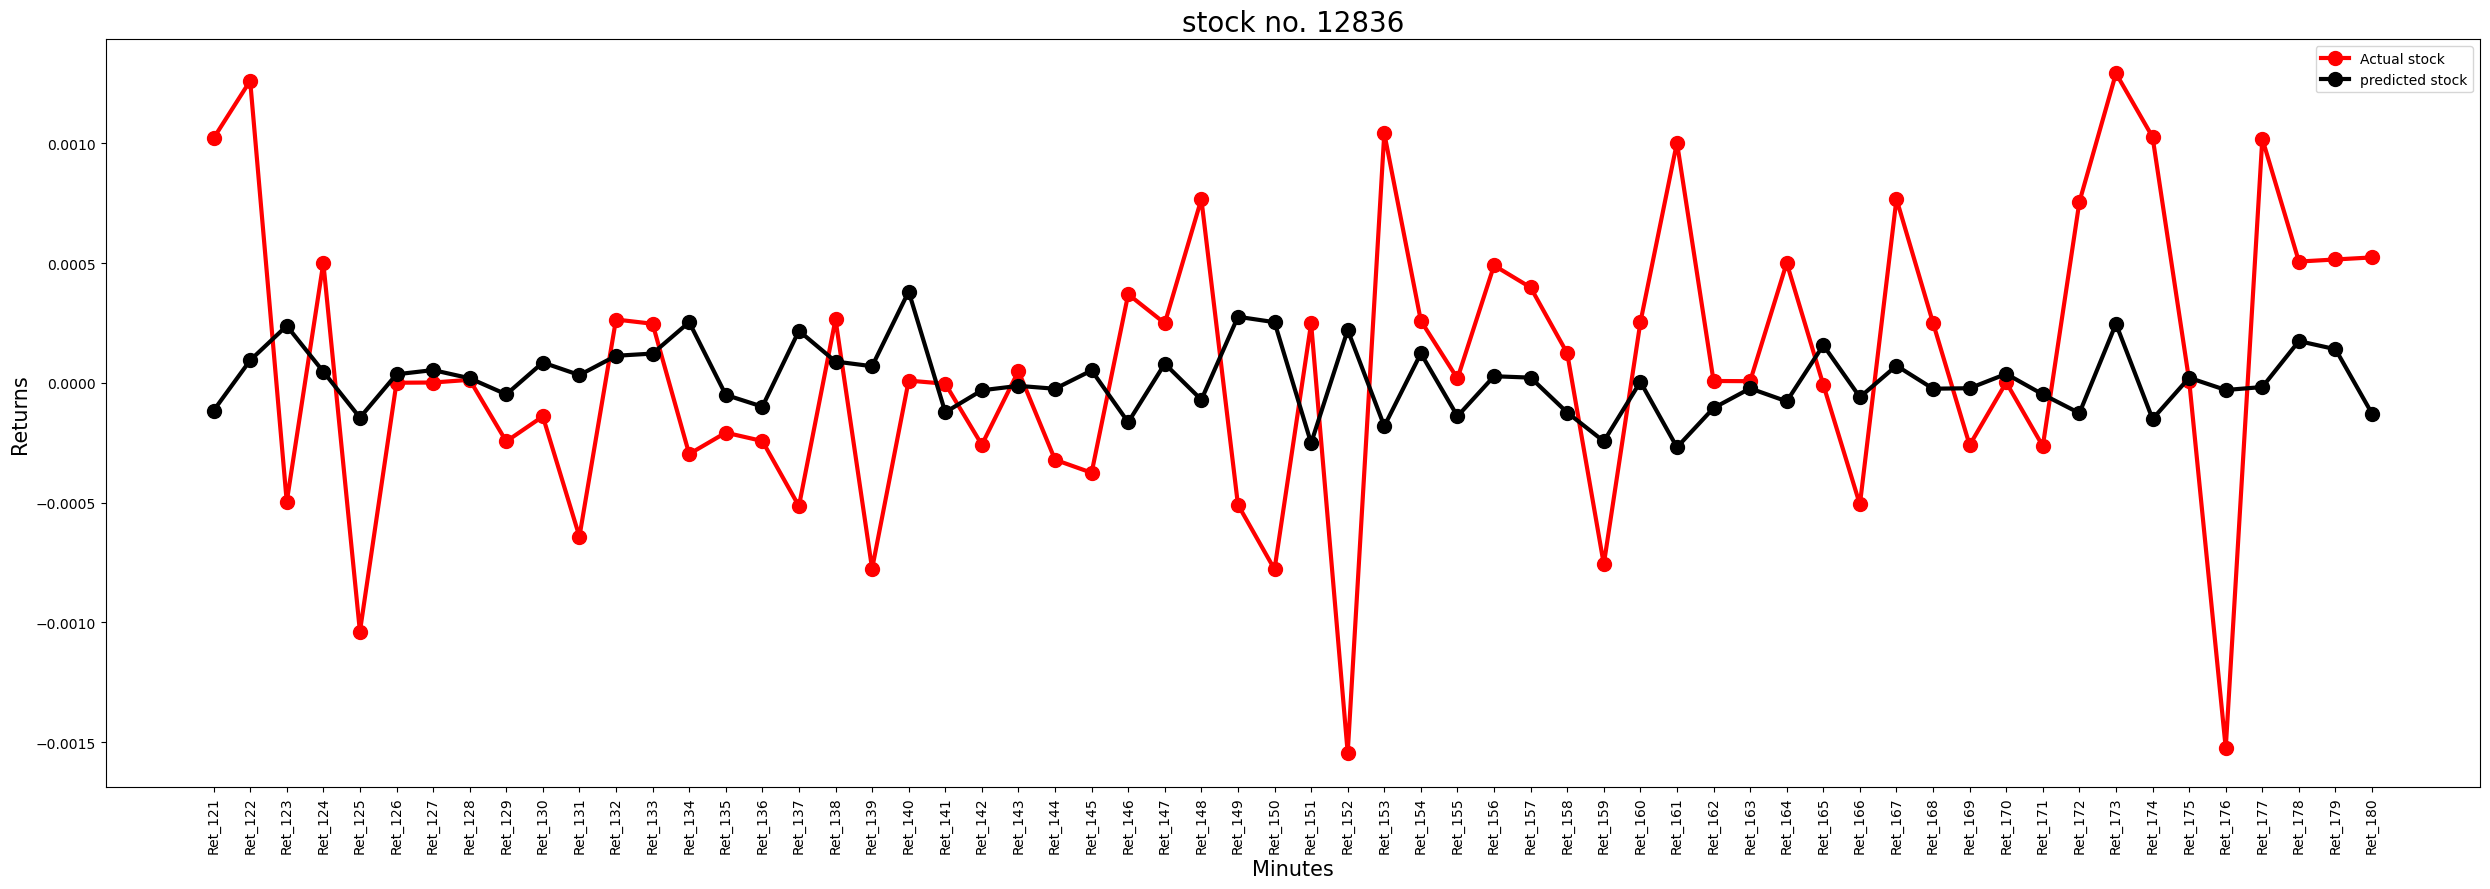

In [39]:
plt.figure(figsize = [25,9])
row = target_for_intraday.iloc[12837]
row_1 = y_test_pred_intra_linear_reg.iloc[0]
x = row.index
y = row.values
a = row_1.values

plt.plot(x,y,marker = "o", ms = 10,linewidth = 3, label = "Actual stock",color= "red")
plt.plot(x,a,marker = "o", ms = 10,linewidth = 3, label = "predicted stock", color = "black")

plt.xlabel('Minutes', fontsize = 15)
plt.ylabel('Returns', fontsize = 15)
plt.title('stock no. 12836', fontsize = 20)
plt.xticks(rotation=90)
plt.legend()

plt.tight_layout()
plt.show()

In [40]:
lr_mae = mean_absolute_error(y_test_intra, y_test_pred_intra_linear_reg)
lr_mse = mean_squared_error(y_test_intra, y_test_pred_intra_linear_reg)
lr_rmse = np.sqrt(lr_mse)
lr_r2 = r2_score(y_test_intra, y_test_pred_intra_linear_reg)

In [41]:
print("Mean Absolute Error:", lr_mae)
print("Mean Squared Error:", lr_mse)
print("Root Mean Squared Error:", lr_rmse)
print("R-squared:", lr_r2)

Mean Absolute Error: 0.0006523970622858782
Mean Squared Error: 1.3734484222998877e-06
Root Mean Squared Error: 0.00117194215825692
R-squared: -0.0020036250409579386


###  <span style="color:Purple;">1.2 LINEAR REGRESSION INTERDAY
 
</span>

In [42]:
inter_linear_reg = LinearRegression()
inter_linear_reg.fit(X=X_train_inter, y=y_train_inter)

LinearRegression()

In [43]:
def predict_returns(reg: RegressorMixin, X: pd.DataFrame, fh: list, prefix: str) -> pd.DataFrame:
    y_pred = reg.predict(X)
    result_cols = [f"{prefix}_{i}_pred" for i in fh]
    result = pd.DataFrame(y_pred, index=X.index, columns=result_cols)
    return result

In [44]:
y_test_pred_inter_linear_reg = predict_returns(
    reg=inter_linear_reg, 
    X=X_test_inter,
    fh=[1, 2], 
    prefix="Ret"
)
y_test_pred_inter_linear_reg.columns = ["Ret_PlusOne_pred", "Ret_PlusTwo_pred"]

In [45]:
y_test_pred_inter_linear_reg.head()

,Ret_PlusOne_pred,Ret_PlusTwo_pred
12836,0.000216,0.001837
10913,-0.001512,-0.001556
4214,0.000300,0.000635
8198,-0.000295,0.001131
31403,-0.001210,0.001167


In [46]:
y_test_pred_inter_linear_reg.shape

(8000, 2)

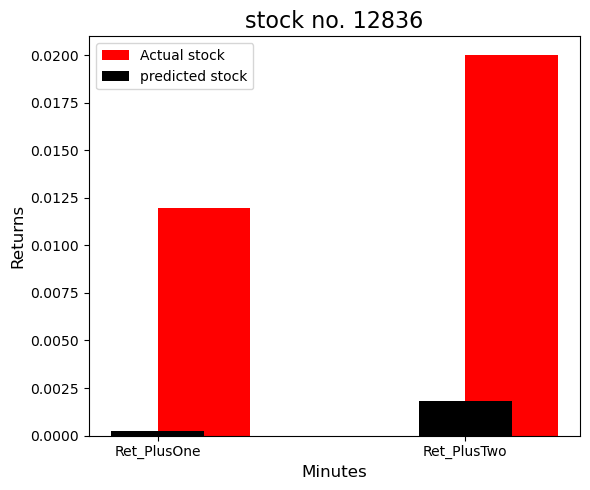

In [47]:
plt.figure(figsize = [6,5])
row = target_for_interday.iloc[12835]
row_1 = y_test_pred_inter_linear_reg.iloc[0]
x = row.index
y = row.values
a = row_1.values

plt.bar(x,y, label = "Actual stock", width = 0.3, align = "edge",color= "red")
plt.bar(x,a, label = "predicted stock", color = "black", width = 0.3)

plt.xlabel('Minutes', fontsize = 12)
plt.ylabel('Returns', fontsize = 12)
plt.title('stock no. 12836', fontsize = 16)
plt.xticks(rotation=0)
plt.legend()

plt.tight_layout()
plt.show()

In [48]:
lr_mae_int = mean_absolute_error(y_test_inter, y_test_pred_inter_linear_reg)
lr_mse_int = mean_squared_error(y_test_inter, y_test_pred_inter_linear_reg)
lr_rmse_int = np.sqrt(lr_mse_int)
lr_r2_int = r2_score(y_test_inter, y_test_pred_inter_linear_reg)

In [49]:
print(lr_mae_int)
print(lr_mse_int)
print(lr_rmse_int)
print(lr_r2_int)

0.01562842450334143
0.0005960428992304623
0.024413989826131702
-0.0016874838333133524


##  <span style="color:BLACK;">              2. XG BOOST!
</span>

###  <span style="color:Purple;">2.1 XG Boost INTRADAY
 
</span>

In [50]:
intra_xgb = XGBRegressor(base_score = 0.5,booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
            monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1)


In [51]:
intra_xgb.fit(X = X_train_intra, y = y_train_intra)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=None, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [52]:
y_test_pred_intra_xgb = predict_returns(
    reg=intra_xgb,
    X=X_test_intra, 
    fh=[i for i in range(121, 181)], 
    prefix="Ret"
)

In [53]:
y_test_pred_intra_xgb.head()

,Ret_121_pred,Ret_122_pred,Ret_123_pred,Ret_124_pred,Ret_125_pred,Ret_126_pred,Ret_127_pred,Ret_128_pred,Ret_129_pred,Ret_130_pred,Ret_131_pred,Ret_132_pred,Ret_133_pred,Ret_134_pred,Ret_135_pred,Ret_136_pred,Ret_137_pred,Ret_138_pred,Ret_139_pred,Ret_140_pred,Ret_141_pred,Ret_142_pred,Ret_143_pred,Ret_144_pred,Ret_145_pred,Ret_146_pred,Ret_147_pred,Ret_148_pred,Ret_149_pred,Ret_150_pred,Ret_151_pred,Ret_152_pred,Ret_153_pred,Ret_154_pred,Ret_155_pred,Ret_156_pred,Ret_157_pred,Ret_158_pred,Ret_159_pred,Ret_160_pred,Ret_161_pred,Ret_162_pred,Ret_163_pred,Ret_164_pred,Ret_165_pred,Ret_166_pred,Ret_167_pred,Ret_168_pred,Ret_169_pred,Ret_170_pred,Ret_171_pred,Ret_172_pred,Ret_173_pred,Ret_174_pred,Ret_175_pred,Ret_176_pred,Ret_177_pred,Ret_178_pred,Ret_179_pred,Ret_180_pred
12836,0.000083,-0.000068,0.000087,-0.000051,-0.000053,-0.000007,-0.000064,-0.000111,0.000057,-0.000048,0.000140,0.000064,0.000008,0.000105,-0.000008,-0.000226,-0.000376,-0.000031,-0.000043,-0.000190,0.000052,-0.000031,0.000012,0.000051,0.000072,-0.000066,0.000098,-0.000100,-0.000061,-0.000112,-0.000415,0.000413,-1.583729e-04,-0.000060,-0.000088,-0.000191,0.000008,-0.000049,0.000495,0.000308,-0.000077,-0.000035,-0.000088,0.000070,0.000047,1.325248e-06,0.000026,0.000252,-0.000057,0.000104,0.000043,0.000020,0.000061,-0.000216,-0.000133,-0.000106,-0.000037,0.000129,-0.000028,-0.000083
10913,-0.000053,0.000191,-0.000275,0.000014,-0.000085,-0.000123,-0.000165,0.000208,-0.000047,-0.000041,0.000102,-0.000059,-0.000275,0.000588,0.000010,-0.000004,0.000263,-0.000086,0.000055,0.000017,0.000785,-0.000533,0.000158,-0.000004,-0.000078,0.000138,-0.000069,0.000090,-0.000099,0.000040,0.000005,0.000447,1.781940e-04,-0.000384,0.000137,0.000005,0.000212,-0.000152,-0.000116,-0.000470,-0.000065,0.000228,-0.000113,-0.000575,-0.000117,1.260454e-04,-0.000076,-0.000009,0.000031,-0.000150,-0.000083,0.000037,0.000080,-0.000038,-0.000032,-0.000118,-0.000080,-0.000019,-0.000365,-0.000154
4214,0.000028,0.000074,0.000071,-0.000067,-0.000038,-0.000005,0.000198,0.000016,0.000063,0.000014,0.000003,0.000007,-0.000002,-0.000026,-0.000149,-0.000155,-0.000034,-0.000085,-0.000091,-0.000084,0.000012,-0.000176,-0.000006,-0.000005,-0.000045,-0.000056,-0.000138,0.000012,0.000236,-0.000146,-0.000219,-0.000026,-6.070314e-05,0.000105,0.000082,0.000011,-0.000026,-0.000060,-0.000002,-0.000051,-0.000007,-0.000035,-0.000024,0.000058,-0.000096,-2.135675e-06,0.000150,0.000086,0.000145,-0.000098,0.000101,0.000066,0.000082,-0.000006,-0.000039,0.000048,-0.000039,-0.000043,0.000120,0.000014
8198,0.000030,0.000051,-0.000187,0.000022,0.000035,-0.000032,0.000031,-0.000017,0.000010,-0.000006,-0.000297,-0.000037,0.000067,-0.000092,0.000022,-0.000056,-0.000007,-0.000066,0.000021,0.000167,-0.000010,-0.000098,0.000149,0.000049,-0.000138,-0.000125,0.000082,0.000024,-0.000005,-0.000037,0.000054,-0.000012,-3.998416e-07,-0.000045,0.000018,-0.000171,0.000170,-0.000031,-0.000153,0.000117,-0.000095,0.000088,-0.000051,-0.000098,0.000111,-5.649952e-08,-0.000157,-0.000009,0.000027,0.000063,0.000028,-0.000060,0.000004,0.000027,-0.000084,0.000146,0.000040,0.000142,-0.000030,-0.000118
31403,0.000092,0.000641,-0.000022,0.000008,0.000288,0.000053,-0.000045,-0.000028,0.000034,0.000028,-0.000327,-0.000041,-0.000016,0.000009,-0.000013,0.000012,0.000194,0.000006,-0.000036,-0.000259,-0.000160,0.000156,0.000039,0.000009,0.000027,0.000036,-0.000015,-0.000889,0.000064,0.000010,0.000029,0.000195,7.978025e-05,-0.000045,-0.000090,0.000110,0.000024,-0.000074,0.000083,0.000322,-0.000153,-0.000180,-0.000099,-0.000063,0.000086,-5.124521e-05,0.000087,0.000148,-0.000116,0.000155,-0.000046,-0.000047,-0.000021,-0.000021,0.000043,-0.000446,-0.000193,-0.000049,-0.000008,0.000062


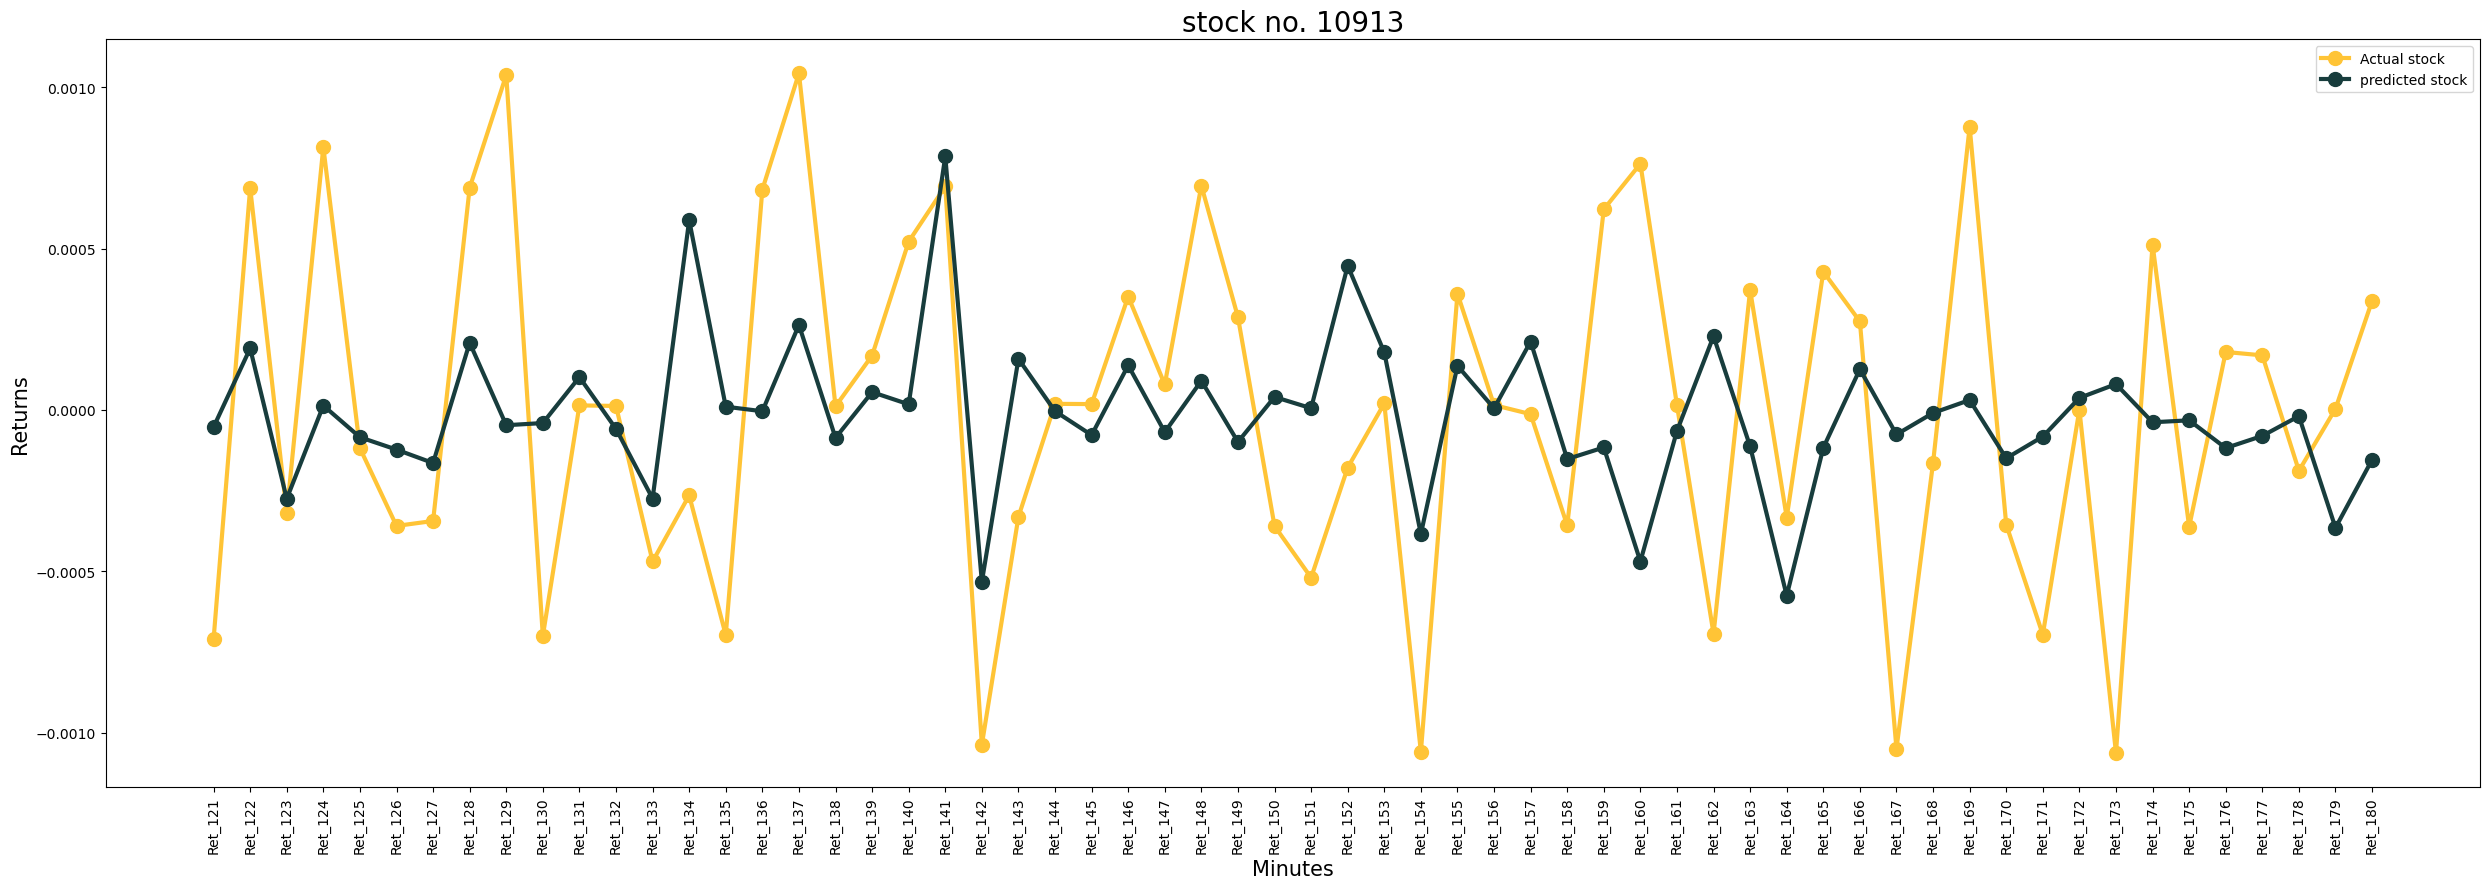

In [54]:
plt.figure(figsize = [25,9])
row = target_for_intraday.iloc[10913]
row_1 = y_test_pred_intra_xgb.iloc[1]
x = row.index
y = row.values
a = row_1.values

plt.plot(x,y,marker = "o", ms = 10,linewidth = 3, label = "Actual stock",color= "#FFC436")
plt.plot(x,a,marker = "o", ms = 10,linewidth = 3, label = "predicted stock", color = "#183D3D")

plt.xlabel('Minutes', fontsize = 15)
plt.ylabel('Returns', fontsize = 15)
plt.title('stock no. 10913', fontsize = 20)
plt.xticks(rotation=90)
plt.legend()

plt.tight_layout()
plt.show()

In [55]:
xg_mae_intra = mean_absolute_error(y_test_intra, y_test_pred_intra_xgb)
xg_mse_intra = mean_squared_error(y_test_intra, y_test_pred_intra_xgb)
xg_rmse_intra = np.sqrt(xg_mse_intra)
xg_r2_intra = r2_score(y_test_intra, y_test_pred_intra_xgb)

In [56]:
xg_mae_intra

0.0006339275303183812

In [57]:
xg_mse_intra

1.39082866108186e-06

In [58]:
xg_r2_intra

-0.019573739312693277

###  <span style="color:Purple;">2.1 XG Boost INTERDAY
 
</span>

In [59]:
inter_xgb = XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
            monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1)

In [60]:
inter_xgb.fit(X = X_train_inter,y = y_train_inter)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=None, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [61]:
y_test_pred_inter_xgb = predict_returns(
    reg=inter_xgb,
    X=X_test_inter, 
    fh=[1, 2], 
    prefix="Ret"
)
y_test_pred_inter_xgb.columns = ["Ret_PlusOne_pred", "Ret_PlusTwo_pred"]

In [62]:
y_test_pred_inter_xgb.head()

,Ret_PlusOne_pred,Ret_PlusTwo_pred
12836,-0.000179,-0.002584
10913,-0.004624,0.013412
4214,0.000892,0.000765
8198,0.000625,0.002203
31403,0.003660,-0.002105


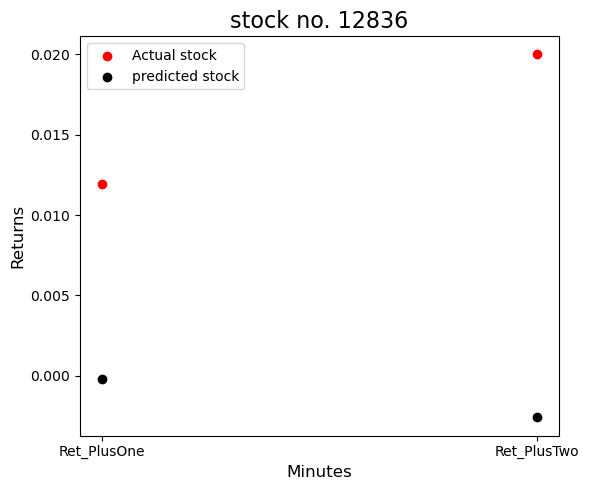

In [63]:
plt.figure(figsize = [6,5])
row = target_for_interday.iloc[12835]
row_1 = y_test_pred_inter_xgb.iloc[0]
x = row.index
y = row.values
a = row_1.values

plt.scatter(x,y, label = "Actual stock", color= "red")
plt.scatter(x,a, label = "predicted stock", color = "black")

plt.xlabel('Minutes', fontsize = 12)
plt.ylabel('Returns', fontsize = 12)
plt.title('stock no. 12836', fontsize = 16)
plt.xticks(rotation=0)
plt.legend()

plt.tight_layout()
plt.show()

In [64]:
xg_mae_int = mean_absolute_error(y_test_inter, y_test_pred_inter_xgb)
xg_mse_int = mean_squared_error(y_test_inter, y_test_pred_inter_xgb)
xg_rmse_int = np.sqrt(xg_mse_int)
xg_r2_int = r2_score(y_test_inter, y_test_pred_inter_xgb)

In [65]:
print(xg_mae_int)
print(xg_mse_int)
print(xg_r2_int)
print(xg_rmse_int)

0.014628009713045289
0.0005283921891333426
0.1114314558981484
0.02298678292265672


###  <span style="color:Purple;">3.1 Last Observation Carried Forward intraday
 
</span>

In [66]:
def predict_locf(row: pd.Series, fh: list, prefix: str) -> pd.Series:
    result_idx = [f"{prefix}_{i}_pred" for i in fh]
    last_obs = row.iloc[-1]
    result = pd.Series(np.full(len(fh), last_obs), index=result_idx)
    return result

In [67]:
y_test_pred_intra_locf = X_test_intra.apply(predict_locf, 
                                            axis=1, 
                                            fh=[i for i in range(121, 181)], prefix="Ret")

In [68]:
y_test_pred_intra_locf.head()

,Ret_121_pred,Ret_122_pred,Ret_123_pred,Ret_124_pred,Ret_125_pred,Ret_126_pred,Ret_127_pred,Ret_128_pred,Ret_129_pred,Ret_130_pred,Ret_131_pred,Ret_132_pred,Ret_133_pred,Ret_134_pred,Ret_135_pred,Ret_136_pred,Ret_137_pred,Ret_138_pred,Ret_139_pred,Ret_140_pred,Ret_141_pred,Ret_142_pred,Ret_143_pred,Ret_144_pred,Ret_145_pred,Ret_146_pred,Ret_147_pred,Ret_148_pred,Ret_149_pred,Ret_150_pred,Ret_151_pred,Ret_152_pred,Ret_153_pred,Ret_154_pred,Ret_155_pred,Ret_156_pred,Ret_157_pred,Ret_158_pred,Ret_159_pred,Ret_160_pred,Ret_161_pred,Ret_162_pred,Ret_163_pred,Ret_164_pred,Ret_165_pred,Ret_166_pred,Ret_167_pred,Ret_168_pred,Ret_169_pred,Ret_170_pred,Ret_171_pred,Ret_172_pred,Ret_173_pred,Ret_174_pred,Ret_175_pred,Ret_176_pred,Ret_177_pred,Ret_178_pred,Ret_179_pred,Ret_180_pred
12836,0.000591,0.000591,0.000591,0.000591,0.000591,0.000591,0.000591,0.000591,0.000591,0.000591,0.000591,0.000591,0.000591,0.000591,0.000591,0.000591,0.000591,0.000591,0.000591,0.000591,0.000591,0.000591,0.000591,0.000591,0.000591,0.000591,0.000591,0.000591,0.000591,0.000591,0.000591,0.000591,0.000591,0.000591,0.000591,0.000591,0.000591,0.000591,0.000591,0.000591,0.000591,0.000591,0.000591,0.000591,0.000591,0.000591,0.000591,0.000591,0.000591,0.000591,0.000591,0.000591,0.000591,0.000591,0.000591,0.000591,0.000591,0.000591,0.000591,0.000591
10913,0.000709,0.000709,0.000709,0.000709,0.000709,0.000709,0.000709,0.000709,0.000709,0.000709,0.000709,0.000709,0.000709,0.000709,0.000709,0.000709,0.000709,0.000709,0.000709,0.000709,0.000709,0.000709,0.000709,0.000709,0.000709,0.000709,0.000709,0.000709,0.000709,0.000709,0.000709,0.000709,0.000709,0.000709,0.000709,0.000709,0.000709,0.000709,0.000709,0.000709,0.000709,0.000709,0.000709,0.000709,0.000709,0.000709,0.000709,0.000709,0.000709,0.000709,0.000709,0.000709,0.000709,0.000709,0.000709,0.000709,0.000709,0.000709,0.000709,0.000709
4214,-0.000502,-0.000502,-0.000502,-0.000502,-0.000502,-0.000502,-0.000502,-0.000502,-0.000502,-0.000502,-0.000502,-0.000502,-0.000502,-0.000502,-0.000502,-0.000502,-0.000502,-0.000502,-0.000502,-0.000502,-0.000502,-0.000502,-0.000502,-0.000502,-0.000502,-0.000502,-0.000502,-0.000502,-0.000502,-0.000502,-0.000502,-0.000502,-0.000502,-0.000502,-0.000502,-0.000502,-0.000502,-0.000502,-0.000502,-0.000502,-0.000502,-0.000502,-0.000502,-0.000502,-0.000502,-0.000502,-0.000502,-0.000502,-0.000502,-0.000502,-0.000502,-0.000502,-0.000502,-0.000502,-0.000502,-0.000502,-0.000502,-0.000502,-0.000502,-0.000502
8198,-0.000016,-0.000016,-0.000016,-0.000016,-0.000016,-0.000016,-0.000016,-0.000016,-0.000016,-0.000016,-0.000016,-0.000016,-0.000016,-0.000016,-0.000016,-0.000016,-0.000016,-0.000016,-0.000016,-0.000016,-0.000016,-0.000016,-0.000016,-0.000016,-0.000016,-0.000016,-0.000016,-0.000016,-0.000016,-0.000016,-0.000016,-0.000016,-0.000016,-0.000016,-0.000016,-0.000016,-0.000016,-0.000016,-0.000016,-0.000016,-0.000016,-0.000016,-0.000016,-0.000016,-0.000016,-0.000016,-0.000016,-0.000016,-0.000016,-0.000016,-0.000016,-0.000016,-0.000016,-0.000016,-0.000016,-0.000016,-0.000016,-0.000016,-0.000016,-0.000016
31403,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002


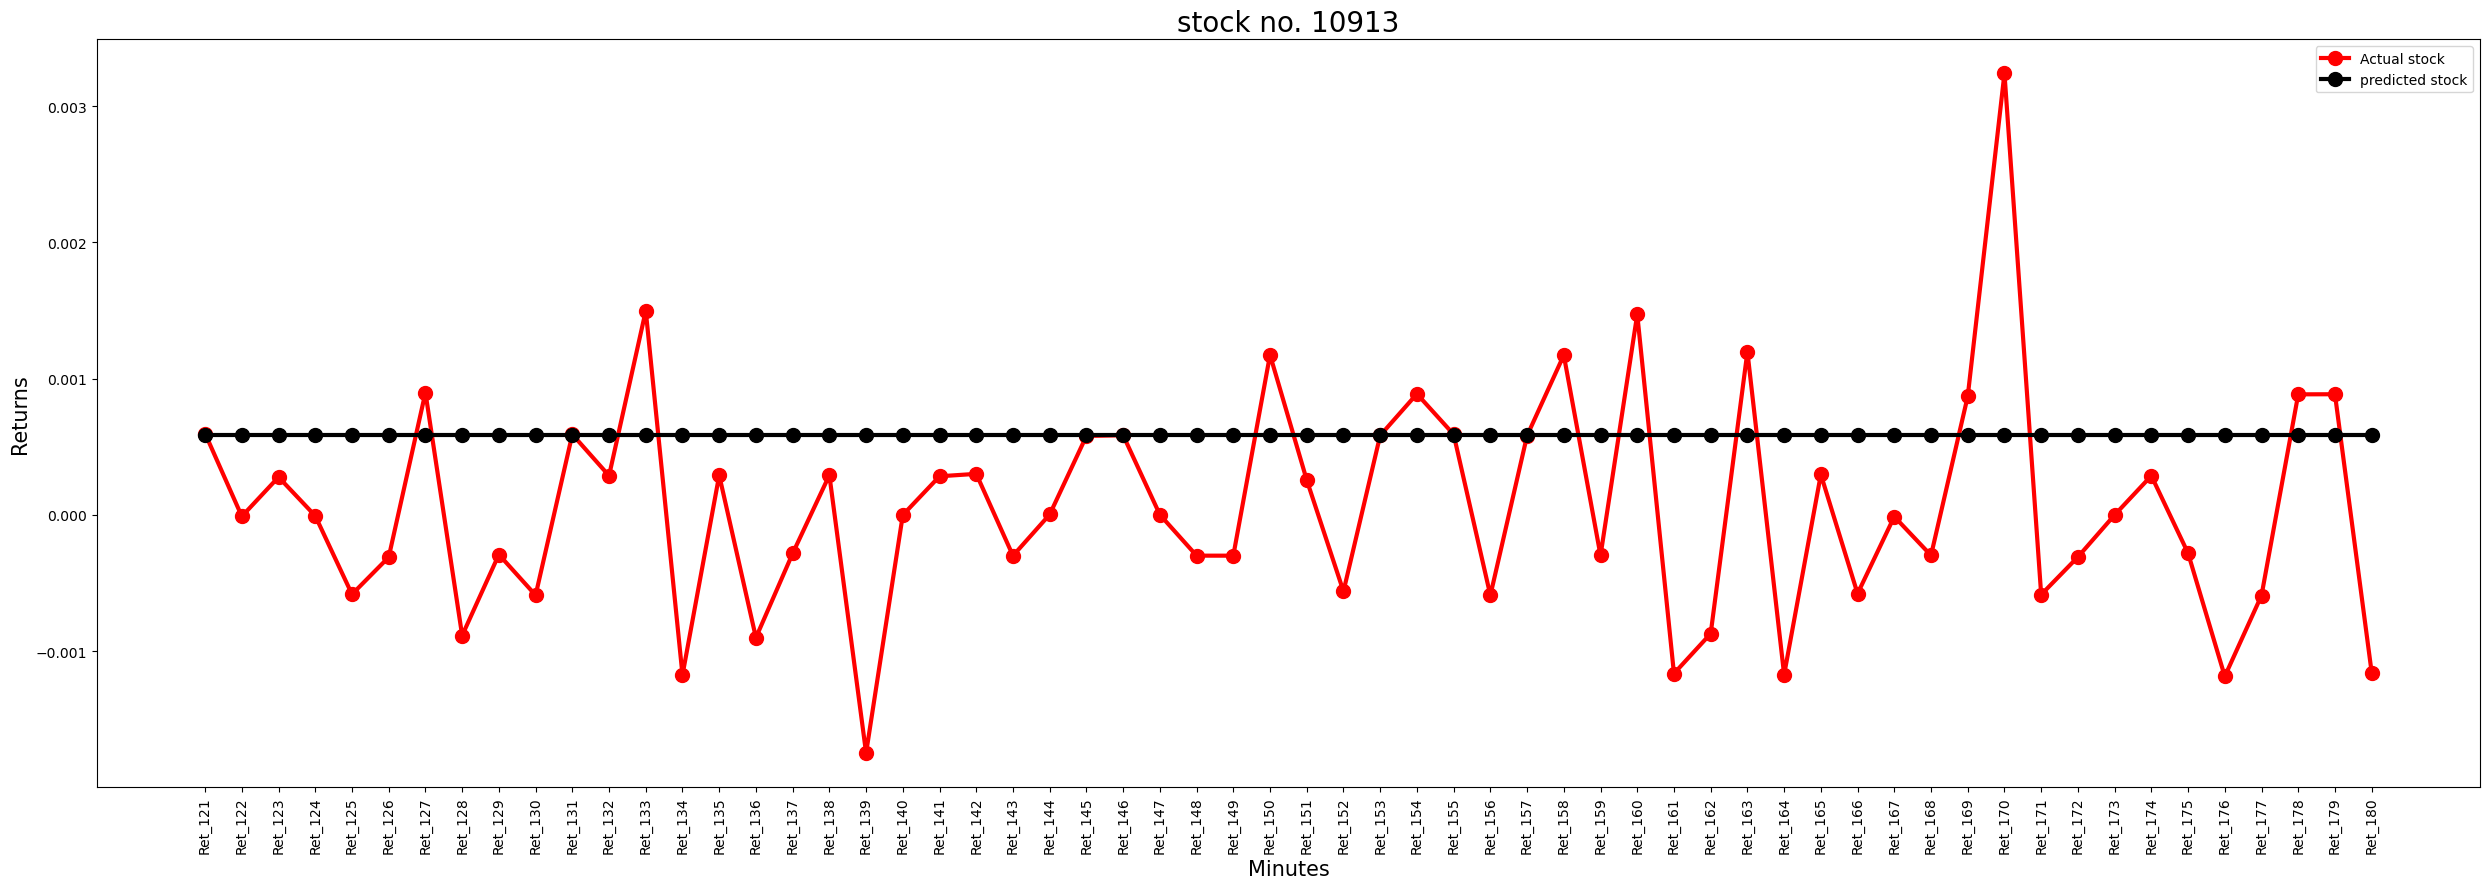

In [69]:
plt.figure(figsize = [25,9])
row = target_for_intraday.iloc[12836]
row_1 = y_test_pred_intra_locf.iloc[0]
x = row.index
y = row.values
a = row_1.values

plt.plot(x,y,marker = "o", ms = 10,linewidth = 3, label = "Actual stock",color= "red")
plt.plot(x,a,marker = "o", ms = 10,linewidth = 3, label = "predicted stock", color = "black")

plt.xlabel('Minutes', fontsize = 15)
plt.ylabel('Returns', fontsize = 15)
plt.title('stock no. 10913', fontsize = 20)
plt.xticks(rotation=90)
plt.legend()

plt.tight_layout()
plt.show()

In [70]:
locf_mae = mean_absolute_error(y_test_intra, y_test_pred_intra_locf)
locf_mse = mean_squared_error(y_test_intra, y_test_pred_intra_locf)
locf_rmse = np.sqrt(locf_mse)
locf_r2 = r2_score(y_test_intra, y_test_pred_intra_locf)

###  <span style="color:Purple;">3.2 Last Observation Carried Forward interday
 
</span>

In [71]:
y_test_pred_inter_locf = X_test_inter.apply(predict_locf, axis=1, fh=[1, 2], prefix="Ret")
y_test_pred_inter_locf.columns = ["Ret_PlusOne_pred", "Ret_PlusTwo_pred"]

In [72]:
y_test_pred_inter_locf.head()

,Ret_PlusOne_pred,Ret_PlusTwo_pred
12836,-0.009541,-0.009541
10913,0.017435,0.017435
4214,-0.007570,-0.007570
8198,-0.003500,-0.003500
31403,0.004694,0.004694


In [73]:
locf_mae_int = mean_absolute_error(y_test_inter, y_test_pred_inter_locf)
locf_mse_int = mean_squared_error(y_test_inter, y_test_pred_inter_locf)
locf_rmse_int = np.sqrt(locf_mse_int)
locf_r2_int = r2_score(y_test_inter, y_test_pred_inter_locf)

In [74]:
print(locf_mae_int)
print(locf_mse_int)
print(locf_rmse_int)
print(locf_r2_int)

0.023633166010756976
0.0014552718244046979
0.03814802517044228
-1.4457593643780904


#  <span style="color:orange;">MODEL Evalution!
</span>

In [75]:
index = ["mse","mae","rmse","r2"]
list_1 = [lr_mse,lr_mae,lr_rmse,lr_r2]
list_2 = [xg_mse_intra,xg_mae_intra,xg_rmse_intra,xg_r2_intra]
list_3 =  [locf_mse,locf_mae,locf_rmse,locf_r2]

In [76]:
list_a = [lr_mse_int,lr_mae_int,lr_rmse_int,lr_r2_int]
list_b = [xg_mse_int,xg_mae_int,xg_rmse_int,xg_r2_int]
list_c = [locf_mse_int,locf_mae_int,locf_rmse_int,locf_r2_int]

In [77]:
score_intraday = pd.DataFrame(list_1, index = index, columns = ["Linear_regression"])
score_intraday["XGB"] = list_2
score_intraday["Locf"] = list_3

In [78]:
score_interday = pd.DataFrame(list_a, index = index, columns = ["Linear_regression"])
score_interday["XGB"] = list_b
score_interday["Locf"] = list_c

In [79]:
score_intraday

,Linear_regression,XGB,Locf
mse,0.000001,0.000001,0.000003
mae,0.000652,0.000634,0.000922
rmse,0.001172,0.001179,0.001612
r2,-0.002004,-0.019574,-0.919586


In [80]:
score_interday

,Linear_regression,XGB,Locf
mse,0.000596,0.000528,0.001455
mae,0.015628,0.014628,0.023633
rmse,0.024414,0.022987,0.038148
r2,-0.001687,0.111431,-1.445759


In [81]:
print(f"                INTERDAY\n\n{score_interday} \n\n                 INTRADAY\n\n{score_intraday}")

                INTERDAY

      Linear_regression       XGB      Locf
mse            0.000596  0.000528  0.001455
mae            0.015628  0.014628  0.023633
rmse           0.024414  0.022987  0.038148
r2            -0.001687  0.111431 -1.445759 

                 INTRADAY

      Linear_regression       XGB      Locf
mse            0.000001  0.000001  0.000003
mae            0.000652  0.000634  0.000922
rmse           0.001172  0.001179  0.001612
r2            -0.002004 -0.019574 -0.919586


#  <span style="color:orange;">Conclusion!
</span>

In [82]:
print("mse:", xg_mse_intra)
print("mae:",xg_mae_intra)
print("rmse:",xg_rmse_intra)
print("r2:",xg_r2_intra)

mse: 1.39082866108186e-06
mae: 0.0006339275303183812
rmse: 0.0011793339904716815
r2: -0.019573739312693277


In [83]:
print("mse:", xg_mse_int)
print("mae:",xg_mae_int)
print("rmse:",xg_rmse_int)
print("r2:",xg_r2_int)

mse: 0.0005283921891333426
mae: 0.014628009713045289
rmse: 0.02298678292265672
r2: 0.1114314558981484


In [84]:
print("mse:", locf_mse_int)
print("mae:",locf_mae_int)
print("rmse:",locf_rmse_int)
print("r2:",locf_r2_int)

mse: 0.0014552718244046979
mae: 0.023633166010756976
rmse: 0.03814802517044228
r2: -1.4457593643780904


Linear Regression:
Utilizing Linear Regression, we sought to capture the
intricate relationships between variables and their impact on
stock price predictions. The results indicate a commendably
low Mean Squared Error (MSE) of 1.373e-06, suggesting that the
model's predictions are closely aligned with the actual
values. However, the negative $R^2$ score of -0.002 implies
that the model might not fully capture the variance in the
data, indicating areas where further refinement could enhance
its predictive power.

XGBoost:
Harnessing the prowess of XGBoost, our endeavor was to unlock
the hidden dynamics of stock price movements. The achieved
metric scores, including an MSE of 1.391e-06 and an impressive
Mean Absolute Error (MAE) of 0.000634, underscore the model's
accuracy in prediction. Yet, the negative $R^2$ of -0.020
signals that while the model performs well in terms of error
metrics, it may benefit from capturing additional complexity
within the data.

LOCF:
The utilization of LOCF, while practical for imputing missing
values, didn't extend to predictive capabilities in the same
vein as the other models. The model metrics, encompassing a
relatively higher RMSE of 0.001612 and a significantly
negative $R^2$ of -0.920, indicate limitations in capturing
R2 the intricate patterns necessary for accurate stock price
forecasts.